### 데이터사이언스융합학과 2024710658 박창준

# Google Colab amount

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### 패키치 설치 및 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

C:\Dev\miniconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


데이터 출처 : https://dacon.io/competitions/official/235713/data

### 변수 설명
- index : index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
        ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
        ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
        ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
        ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함

### Data Load

In [3]:
df = pd.read_csv("D:/박창준 문서/4. 대학교육/2. 성균관대학교 일반대학원/Code/Credit_Card_Members.csv")

In [4]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['credit'])  # 종속 변수를 제외한 모든 독립 변수들
y = df['credit']  # 종속 변수

# train과 test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle = True)

In [5]:
train = pd.concat([X_train, y_train], axis=1)
# 인덱스를 다시 설정
train.reset_index(drop=True, inplace=True)

In [6]:
test = pd.concat([X_test, y_test], axis=1)
# 인덱스를 다시 설정
test.reset_index(drop=True, inplace=True)

In [7]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,6157,M,N,N,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-14118,-3174,1,0,0,0,Laborers,1.0,-30.0,1.0
1,4380,M,N,Y,1,135000.0,Working,Secondary / secondary special,Married,Rented apartment,-10414,-2742,1,1,1,0,Laborers,3.0,-4.0,2.0
2,14152,F,Y,Y,0,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15653,-5500,1,0,0,1,Core staff,2.0,-17.0,1.0
3,13816,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18213,-1151,1,1,0,0,Managers,2.0,-23.0,2.0
4,13382,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,-8319,-689,1,1,0,0,NaN,2.0,-10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,630,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,-23640,365243,1,0,1,1,NaN,2.0,-13.0,2.0
21161,18430,F,Y,Y,0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12461,-678,1,0,0,0,Sales staff,2.0,-13.0,0.0
21162,23840,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,-9124,-960,1,1,0,0,Drivers,2.0,-16.0,2.0
21163,19936,M,Y,Y,0,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18328,-3779,1,0,0,0,Drivers,1.0,-23.0,0.0


In [8]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,18034,F,N,N,0,405000.0,Commercial associate,Higher education,Married,House / apartment,-13692,-200,1,0,1,0,Managers,2.0,-53.0,0.0
1,25639,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-16133,-582,1,0,0,0,Sales staff,2.0,-2.0,1.0
2,3436,M,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-20931,-191,1,0,1,1,Security staff,2.0,-17.0,2.0
3,15945,F,N,Y,0,139500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20514,-5707,1,0,1,0,NaN,2.0,-30.0,1.0
4,6355,M,Y,Y,0,270000.0,Working,Lower secondary,Separated,House / apartment,-19164,-3825,1,1,0,0,Laborers,1.0,-22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,252,F,Y,N,1,90000.0,Working,Incomplete higher,Married,Rented apartment,-12383,-3480,1,0,0,0,Laborers,3.0,-6.0,1.0
5288,3414,M,Y,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,-18441,-1540,1,1,1,0,Drivers,2.0,-52.0,1.0
5289,17389,M,Y,N,2,292500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14670,-6957,1,0,1,0,NaN,4.0,-27.0,2.0
5290,11952,M,Y,N,0,900000.0,State servant,Higher education,Married,House / apartment,-23392,-1921,1,0,1,0,Core staff,2.0,-46.0,0.0


### EDA & Preprocessing

1) 개형 확인

In [9]:
train.shape

(21165, 20)

In [10]:
test.shape

(5292, 20)

2) 컬럼별 자료형 확인

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21165 non-null  int64  
 1   gender         21165 non-null  object 
 2   car            21165 non-null  object 
 3   reality        21165 non-null  object 
 4   child_num      21165 non-null  int64  
 5   income_total   21165 non-null  float64
 6   income_type    21165 non-null  object 
 7   edu_type       21165 non-null  object 
 8   family_type    21165 non-null  object 
 9   house_type     21165 non-null  object 
 10  DAYS_BIRTH     21165 non-null  int64  
 11  DAYS_EMPLOYED  21165 non-null  int64  
 12  FLAG_MOBIL     21165 non-null  int64  
 13  work_phone     21165 non-null  int64  
 14  phone          21165 non-null  int64  
 15  email          21165 non-null  int64  
 16  occyp_type     14580 non-null  object 
 17  family_size    21165 non-null  float64
 18  begin_

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5292 non-null   int64  
 1   gender         5292 non-null   object 
 2   car            5292 non-null   object 
 3   reality        5292 non-null   object 
 4   child_num      5292 non-null   int64  
 5   income_total   5292 non-null   float64
 6   income_type    5292 non-null   object 
 7   edu_type       5292 non-null   object 
 8   family_type    5292 non-null   object 
 9   house_type     5292 non-null   object 
 10  DAYS_BIRTH     5292 non-null   int64  
 11  DAYS_EMPLOYED  5292 non-null   int64  
 12  FLAG_MOBIL     5292 non-null   int64  
 13  work_phone     5292 non-null   int64  
 14  phone          5292 non-null   int64  
 15  email          5292 non-null   int64  
 16  occyp_type     3706 non-null   object 
 17  family_size    5292 non-null   float64
 18  begin_mo

3) target (credit 컬럼) 확인

In [13]:
train['credit'].value_counts()

credit
2.0    13574
1.0     5013
0.0     2578
Name: count, dtype: int64

In [14]:
train['credit'].value_counts(normalize=True)

credit
2.0    0.641342
1.0    0.236853
0.0    0.121805
Name: proportion, dtype: float64

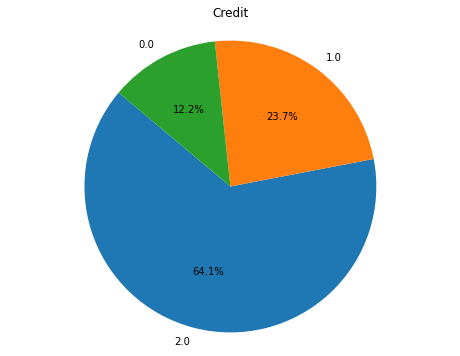

In [15]:
import matplotlib.pyplot as plt

# credit 컬럼의 값 빈도 계산
credit_counts = train['credit'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
plt.pie(credit_counts, labels=credit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Credit')
plt.axis('equal')
plt.show()

4)  Numeric column, Categorical column 나누기

In [16]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [17]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'credit']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [18]:
print(numerical_list)
print(categorical_list)

['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'credit']


4) 컬럼별 이상치분석

- Numerical Data

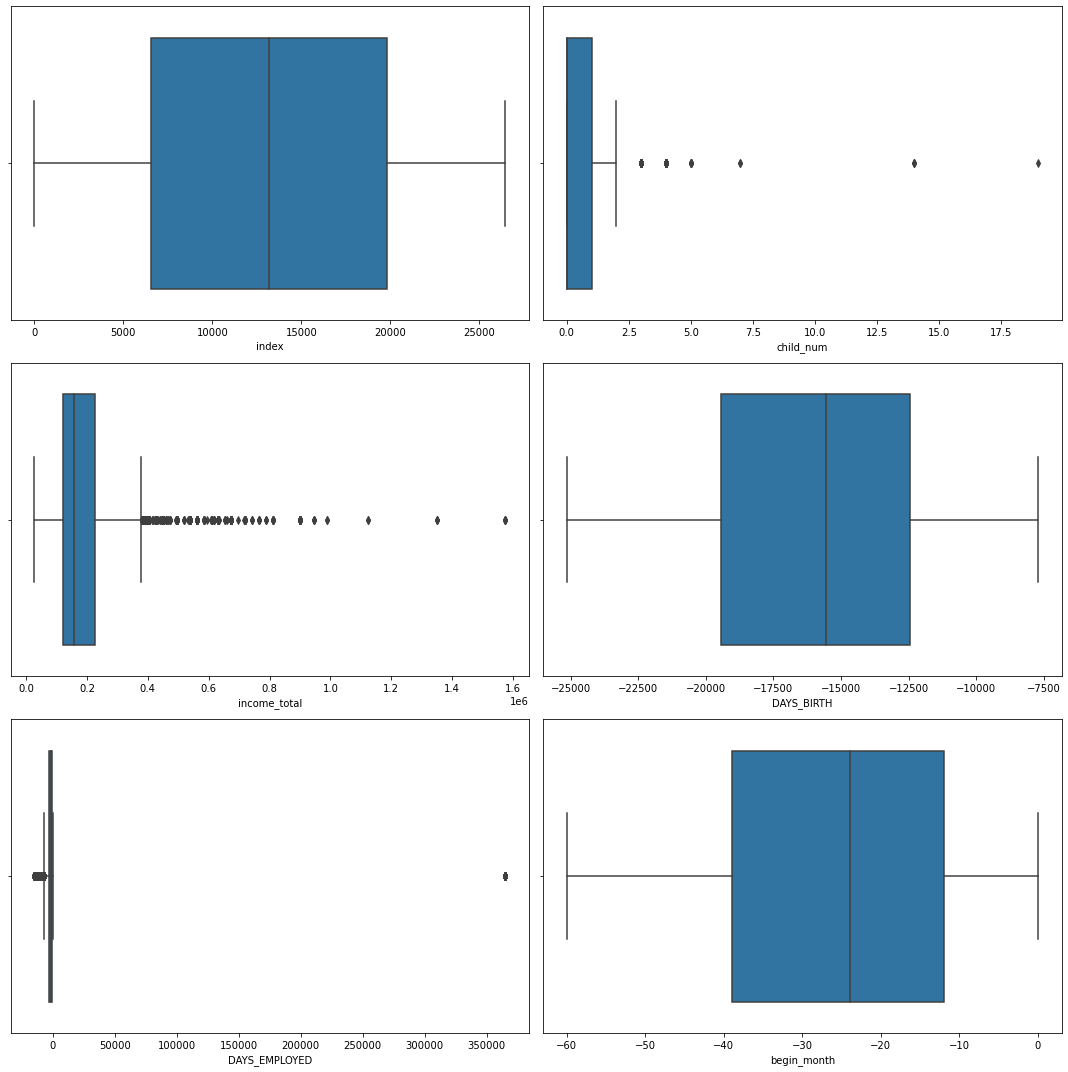

In [19]:
def visualize_outliers_iqr(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols // 2, 2, figsize=(15, 15))
    for i, col in enumerate(columns):
        row = i // 2
        col = i % 2
        Q1 = df[columns[i]].quantile(0.25)  # 수정 필요: df[col] -> df[columns[i]]
        Q3 = df[columns[i]].quantile(0.75)  # 수정 필요: df[col] -> df[columns[i]]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[((df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound))]
        sns.boxplot(x=df[columns[i]], ax=axes[row, col])
    plt.tight_layout()
    plt.show()

# 이상치 분석 및 시각화
visualize_outliers_iqr(train, numerical_list)

    (4-1) child_num >= 7인 경우 모두 credit = 2 를 보여줌

In [20]:
train[train['child_num'] >= 7][['child_num', 'credit']]

,child_num,credit
3006,14,2.0
5902,7,2.0
7409,14,2.0
8133,7,2.0
17039,19,2.0
20518,14,2.0


    (4-1) child_num >= 7인 경우 제거

In [21]:
train = train[train['child_num'] < 8]

In [22]:
train[train['child_num'] > 7]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


    (4-2) DAYS_EMPLOYED == 365243인 컬럼이 train 4,438개이며, 이때의 occyp_type은 전부 'NaN'

In [23]:
train[train['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'occyp_type', 'credit']]

,DAYS_EMPLOYED,occyp_type,credit
13,365243,NaN,2.0
17,365243,NaN,2.0
18,365243,NaN,2.0
19,365243,NaN,1.0
23,365243,NaN,1.0
...,...,...,...
21132,365243,NaN,1.0
21142,365243,NaN,2.0
21147,365243,NaN,1.0
21153,365243,NaN,1.0


    (4-2) DAYS_EMPLOYED == 365243인 컬럼이 df에서는 6,135개

In [24]:
train[train['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'occyp_type']]

,DAYS_EMPLOYED,occyp_type
13,365243,NaN
17,365243,NaN
18,365243,NaN
19,365243,NaN
23,365243,NaN
...,...,...
21132,365243,NaN
21142,365243,NaN
21147,365243,NaN
21153,365243,NaN


    (4-2) 365243일이면 연으로 환산시 1,000년이 넘으므로, 잘못된 값으로 판단.
          DAYS_EMPLOYED == 365243인 컬럼 모두 0으로 변환

In [25]:
train.loc[train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

In [26]:
train.loc[train['DAYS_EMPLOYED'] == 0, 'DAYS_EMPLOYED']

13       0
17       0
18       0
19       0
23       0
        ..
21132    0
21142    0
21147    0
21153    0
21160    0
Name: DAYS_EMPLOYED, Length: 3585, dtype: int64

- Categorical Data

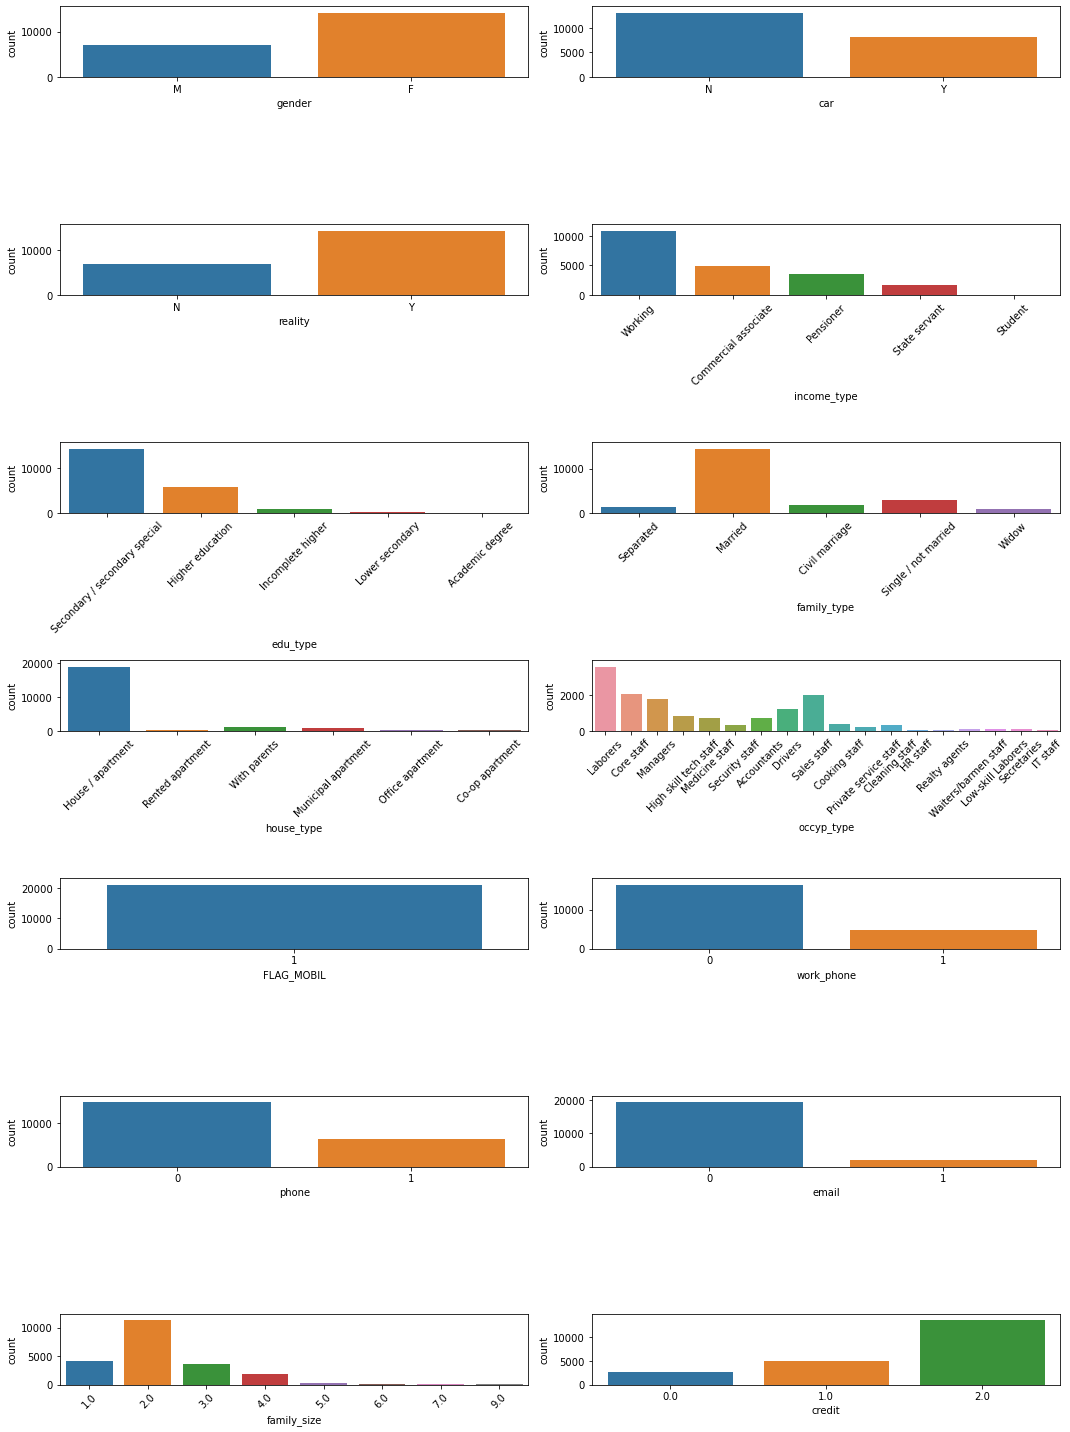

In [27]:
def visualize_categorical(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots((num_cols + 1) // 2, 2, figsize=(15, 20))
    for i, col in enumerate(columns):
        row = i // 2
        col = i % 2
        sns.countplot(x=columns[i], data=df, ax=axes[row, col])
        if len(df[columns[i]].unique()) >= 4:
            axes[row, col].tick_params(axis='x', rotation=45)  # x축 눈금 레이블 45도 회전
        axes[row, col].set_ylim(0, df[columns[i]].value_counts().max() * 1.1)  # y축 늘리기
    plt.tight_layout()
    plt.show()

# 카테고리컬 변수 시각화
visualize_categorical(train, categorical_list)

    (4-3) family_size >= 7인 경우 모두 credit = 2 를 보여줌

In [28]:
train[train['family_size'] > 7][['family_size', 'credit']]

,family_size,credit
5902,9.0,2.0
8133,9.0,2.0


    (4-3) family_size > 7인 경우 전부 제거

In [29]:
train = train[train['family_size'] < 8]

In [30]:
train[train['family_size'] >= 8]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


5) 데이터 정확성 확인

In [31]:
train['age'] = (train['DAYS_BIRTH'] * -1) // 365
test['age'] = (test['DAYS_BIRTH'] * -1) // 365

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21159 entries, 0 to 21164
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21159 non-null  int64  
 1   gender         21159 non-null  object 
 2   car            21159 non-null  object 
 3   reality        21159 non-null  object 
 4   child_num      21159 non-null  int64  
 5   income_total   21159 non-null  float64
 6   income_type    21159 non-null  object 
 7   edu_type       21159 non-null  object 
 8   family_type    21159 non-null  object 
 9   house_type     21159 non-null  object 
 10  DAYS_BIRTH     21159 non-null  int64  
 11  DAYS_EMPLOYED  21159 non-null  int64  
 12  FLAG_MOBIL     21159 non-null  int64  
 13  work_phone     21159 non-null  int64  
 14  phone          21159 non-null  int64  
 15  email          21159 non-null  int64  
 16  occyp_type     14574 non-null  object 
 17  family_size    21159 non-null  float64
 18  begin_month

    (5-1) 퇴직할 나이가 아닌데도 불구하고 연급 수령을 받는사람 조회

In [33]:
train[(train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()) & (train['age'] < 60)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
13,21627,M,N,Y,0,114750.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-8.0,2.0,58
18,25348,F,N,Y,0,202500.0,Pensioner,Lower secondary,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-17.0,2.0,58
23,11396,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-5.0,1.0,56
36,14069,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-50.0,2.0,58
40,16399,M,Y,Y,0,360000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-50.0,1.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21107,19226,F,Y,N,0,45000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-11.0,2.0,56
21116,1012,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-39.0,1.0,54
21127,7240,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-12.0,2.0,56
21142,18824,F,N,N,0,265500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-45.0,2.0,56


    (5-2) 31세 미만의 Pensioner(연급수급자)는 이상치로 분류하여 삭제

In [34]:
train = train.drop(train[(train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()) & (train['age'] < 31)].index)

In [35]:
# test = test.drop(test[(test['income_type'] == 'Pensioner') & (test['occyp_type'].isna()) & (test['age'] < 31)].index)

In [36]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,6157,M,N,N,0,135000.0,Working,Secondary / secondary special,Separated,House / apartment,...,-3174,1,0,0,0,Laborers,1.0,-30.0,1.0,38
1,4380,M,N,Y,1,135000.0,Working,Secondary / secondary special,Married,Rented apartment,...,-2742,1,1,1,0,Laborers,3.0,-4.0,2.0,28
2,14152,F,Y,Y,0,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-5500,1,0,0,1,Core staff,2.0,-17.0,1.0,42
3,13816,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1151,1,1,0,0,Managers,2.0,-23.0,2.0,49
4,13382,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,...,-689,1,1,0,0,NaN,2.0,-10.0,2.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21160,630,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,1,1,NaN,2.0,-13.0,2.0,64
21161,18430,F,Y,Y,0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-678,1,0,0,0,Sales staff,2.0,-13.0,0.0,34
21162,23840,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,...,-960,1,1,0,0,Drivers,2.0,-16.0,2.0,24
21163,19936,M,Y,Y,0,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-3779,1,0,0,0,Drivers,1.0,-23.0,0.0,50


    (5-3) 31세 이상 ~ 60세 미만의 연급수급자는 income_type을 Pensioner_Special로 변경

In [37]:
train.loc[(train['age'] >= 31) & (train['age'] < 60) & (train['income_type'] == 'Pensioner'), 'income_type'] = 'Pensioner_Special'

In [38]:
test.loc[(test['age'] >= 31) & (test['age'] < 60) & (test['income_type'] == 'Pensioner'), 'income_type'] = 'Pensioner_Special'

    (5-4) child_num > 0 이면서 family_type == 'Single / not married인 경우를 확인

In [39]:
train[(train['family_type'] == 'Single / not married') & (train['child_num'] > 0)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
101,20012,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-5570,1,1,1,1,High skill tech staff,2.0,-15.0,2.0,49
168,14662,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-4019,1,0,0,0,Laborers,3.0,-18.0,2.0,31
197,10128,F,Y,N,1,175500.0,Commercial associate,Secondary / secondary special,Single / not married,Municipal apartment,...,-4983,1,0,0,0,Laborers,2.0,-43.0,2.0,32
220,9905,F,N,Y,1,225000.0,Working,Higher education,Single / not married,House / apartment,...,-464,1,0,0,0,Sales staff,2.0,-41.0,2.0,29
272,15903,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2479,1,0,0,0,Managers,2.0,-41.0,2.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,4590,F,Y,N,1,112500.0,Working,Higher education,Single / not married,House / apartment,...,-1618,1,0,0,0,Core staff,2.0,-43.0,2.0,27
20971,2595,F,N,N,1,135000.0,State servant,Secondary / secondary special,Single / not married,Office apartment,...,-4089,1,0,0,0,NaN,2.0,-34.0,1.0,33
20998,25012,F,Y,Y,1,560250.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-2330,1,0,0,0,Sales staff,2.0,-16.0,2.0,35
21003,8618,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-1436,1,0,0,0,Private service staff,2.0,-48.0,2.0,31


    (5-5) 미혼모, 입양 등의 경우가 있을 수 있으므로 family type을 'Adopt'으로 설정

In [40]:
train.loc[(train['family_type'] == 'Single / not married') & (train['child_num'] > 0), 'family_type'] = 'Adopt'

In [41]:
test.loc[(test['family_type'] == 'Single / not married') & (test['child_num'] > 0), 'family_type'] = 'Adopt'

In [42]:
train[train['family_type']== 'Adopt']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
101,20012,F,N,Y,1,112500.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-5570,1,1,1,1,High skill tech staff,2.0,-15.0,2.0,49
168,14662,M,N,Y,2,270000.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-4019,1,0,0,0,Laborers,3.0,-18.0,2.0,31
197,10128,F,Y,N,1,175500.0,Commercial associate,Secondary / secondary special,Adopt,Municipal apartment,...,-4983,1,0,0,0,Laborers,2.0,-43.0,2.0,32
220,9905,F,N,Y,1,225000.0,Working,Higher education,Adopt,House / apartment,...,-464,1,0,0,0,Sales staff,2.0,-41.0,2.0,29
272,15903,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Adopt,House / apartment,...,-2479,1,0,0,0,Managers,2.0,-41.0,2.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,4590,F,Y,N,1,112500.0,Working,Higher education,Adopt,House / apartment,...,-1618,1,0,0,0,Core staff,2.0,-43.0,2.0,27
20971,2595,F,N,N,1,135000.0,State servant,Secondary / secondary special,Adopt,Office apartment,...,-4089,1,0,0,0,NaN,2.0,-34.0,1.0,33
20998,25012,F,Y,Y,1,560250.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-2330,1,0,0,0,Sales staff,2.0,-16.0,2.0,35
21003,8618,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Adopt,House / apartment,...,-1436,1,0,0,0,Private service staff,2.0,-48.0,2.0,31


6) 결측치 확인 및 처리

In [43]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       6569
family_size         0
begin_month         0
credit              0
age                 0
dtype: int64

In [44]:
train_null = pd.DataFrame(train.isnull().sum(), columns=['null'])
train_null['null_ratio'] = train_null['null'] / len(train)
train_null.sort_values(by = ['null_ratio'], ascending = False)

,null,null_ratio
occyp_type,6569,0.310694
index,0,0.000000
DAYS_EMPLOYED,0,0.000000
credit,0,0.000000
begin_month,0,0.000000
family_size,0,0.000000
email,0,0.000000
phone,0,0.000000
work_phone,0,0.000000
FLAG_MOBIL,0,0.000000


    (6-1) age >= 60 이면서 income_type == 'Pensioner' 이면서 occyp_type == Nan인 경우,
          노후걱정 없는 은퇴자로 판단하여, 'Retired_Pensioner'로 대체

In [45]:
train[(train['age'] >= 60) & (train['income_type'] == 'Pensioner') & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
17,10634,F,N,Y,0,103500.0,Pensioner,Lower secondary,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-6.0,2.0,63
19,9741,F,Y,Y,0,90000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,0.0,1.0,60
25,651,M,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-20.0,2.0,64
32,15528,F,Y,N,0,121500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-13.0,2.0,63
35,24649,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,1,0,NaN,1.0,-3.0,0.0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21113,19070,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-8.0,2.0,64
21117,23909,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-39.0,2.0,60
21132,19481,M,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-24.0,1.0,63
21147,6821,F,N,N,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-2.0,1.0,65


In [46]:
test[(test['age'] >= 60) & (test['income_type'] == 'Pensioner') & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
12,23903,F,N,Y,0,247500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-56.0,2.0,63
13,17173,F,Y,Y,0,162000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-56.0,2.0,65
14,11173,F,N,Y,0,126000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1.0,-47.0,2.0,66
39,4915,F,Y,N,0,121500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-47.0,2.0,63
78,11898,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-13.0,1.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2548,F,Y,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-23.0,2.0,60
5165,15181,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-13.0,2.0,62
5222,15559,F,N,N,0,135000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-14.0,1.0,65
5233,9884,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-45.0,0.0,63


In [47]:
train.loc[(train['age'] >= 60) & (train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()), 'occyp_type'] = 'Retired_Pensioner'
test.loc[(test['age'] >= 60) & (test['income_type'] == 'Pensioner') & (test['occyp_type'].isna()), 'occyp_type'] = 'Retired_Pensioner'

    (6-2) age >= 60이면서 DAYS_EMPLOYED != 0 이면서, occyp_type == Nan인 경우,
          퇴직하지 않고 일하고 있는 그룹으로 'Not_retired'으로 대체

In [48]:
train[(train['age']>=60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna())][['age', 'income_total','income_type', 'occyp_type', 'credit']]

,age,income_total,income_type,occyp_type,credit
29,62,265500.0,State servant,NaN,2.0
366,60,202500.0,State servant,NaN,1.0
485,60,202500.0,State servant,NaN,2.0
838,63,247500.0,Commercial associate,NaN,2.0
900,60,202500.0,State servant,NaN,2.0
...,...,...,...,...,...
20350,61,166500.0,Working,NaN,0.0
20506,60,135000.0,Working,NaN,1.0
21037,66,180000.0,Working,NaN,2.0
21122,60,405000.0,Commercial associate,NaN,2.0


In [49]:
test[(test['age']>=60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna())][['age', 'income_total','income_type', 'occyp_type']]

,age,income_total,income_type,occyp_type
266,64,112500.0,Working,NaN
1243,60,247500.0,Working,NaN
1466,63,247500.0,Commercial associate,NaN
2485,63,247500.0,Commercial associate,NaN
2629,62,360000.0,Commercial associate,NaN
2801,60,99000.0,Working,NaN
2923,62,450000.0,State servant,NaN
3318,60,202500.0,State servant,NaN
3320,62,450000.0,State servant,NaN
3520,63,171000.0,Working,NaN


In [50]:
train.loc[(train['age'] >= 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'Not_retired'
test.loc[(test['age'] >= 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'Not_retired'

In [51]:
train[train['occyp_type'] == 'Not_retired']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
29,15216,F,N,N,0,265500.0,State servant,Secondary / secondary special,Separated,House / apartment,...,-4206,1,0,0,0,Not_retired,1.0,-60.0,2.0,62
366,18626,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-45.0,1.0,60
485,8774,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-37.0,2.0,60
838,10794,F,N,Y,0,247500.0,Commercial associate,Higher education,Widow,House / apartment,...,-1233,1,0,1,0,Not_retired,1.0,-51.0,2.0,63
900,16368,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-39.0,2.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20350,15844,F,N,N,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,...,-5467,1,0,1,0,Not_retired,2.0,-28.0,0.0,61
20506,22655,F,N,Y,0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-229,1,0,1,0,Not_retired,1.0,-18.0,1.0,60
21037,18031,F,N,N,0,180000.0,Working,Secondary / secondary special,Widow,House / apartment,...,-4369,1,0,0,0,Not_retired,1.0,-43.0,2.0,66
21122,16044,F,N,Y,0,405000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-9046,1,0,1,0,Not_retired,2.0,-27.0,2.0,60


    (6-3) 'age' < 60 이면서 DAYS_EMPLOYED == 0 이면서, occyp_type == Nan인 경우,
           일을 하지 않는 그룹으로'unemployed'로 대체

In [52]:
train[(train['age'] < 60) & (train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
13,21627,M,N,Y,0,114750.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-8.0,2.0,58
18,25348,F,N,Y,0,202500.0,Pensioner_Special,Lower secondary,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-17.0,2.0,58
23,11396,F,N,Y,0,90000.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-5.0,1.0,56
36,14069,F,N,Y,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-50.0,2.0,58
40,16399,M,Y,Y,0,360000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-50.0,1.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21107,19226,F,Y,N,0,45000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-11.0,2.0,56
21116,1012,F,Y,Y,0,225000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-39.0,1.0,54
21127,7240,F,N,Y,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-12.0,2.0,56
21142,18824,F,N,N,0,265500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-45.0,2.0,56


In [53]:
test[(test['age'] < 60) & (test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age


In [54]:
train.loc[(train['age'] < 60) & (train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'unemployed'
test.loc[(test['age'] < 60) & (test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'unemployed'

In [55]:
train[train['occyp_type'] == 'unemployed']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
13,21627,M,N,Y,0,114750.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,unemployed,1.0,-8.0,2.0,58
18,25348,F,N,Y,0,202500.0,Pensioner_Special,Lower secondary,Single / not married,House / apartment,...,0,1,0,0,0,unemployed,1.0,-17.0,2.0,58
23,11396,F,N,Y,0,90000.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,unemployed,1.0,-5.0,1.0,56
36,14069,F,N,Y,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-50.0,2.0,58
40,16399,M,Y,Y,0,360000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-50.0,1.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21107,19226,F,Y,N,0,45000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,unemployed,2.0,-11.0,2.0,56
21116,1012,F,Y,Y,0,225000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-39.0,1.0,54
21127,7240,F,N,Y,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-12.0,2.0,56
21142,18824,F,N,N,0,265500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-45.0,2.0,56


    (6-4) 'age' < 60 이면서 DAYS_EMPLOYED != 0 이면서, occyp_type == Nan인 경우,
           일을 여전히 하고 있는 그룹이나, 직업을 특정하기 어려워 새로운 클래스인 'Worekrs'로 대체

In [56]:
train.groupby('edu_type')['occyp_type'].apply(lambda x: x.value_counts())

edu_type                                    
Academic degree                Sales staff         5
                               Not_retired         4
                               Managers            2
                               unemployed          1
Higher education               Managers         1010
                                                ... 
Secondary / secondary special  Not_retired        50
                               Realty agents      49
                               Secretaries        34
                               HR staff           25
                               IT staff            8
Name: occyp_type, Length: 77, dtype: int64

In [57]:
train[(train['age'] < 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
4,13382,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,...,-689,1,1,0,0,NaN,2.0,-10.0,2.0,22
5,7670,F,N,N,0,261000.0,Commercial associate,Incomplete higher,Married,House / apartment,...,-1070,1,1,0,0,NaN,2.0,-4.0,1.0,27
15,24070,F,N,Y,0,193500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-9683,1,0,0,0,NaN,1.0,-39.0,0.0,50
16,12850,F,N,Y,0,405000.0,Working,Higher education,Married,House / apartment,...,-7627,1,0,0,0,NaN,2.0,-33.0,0.0,47
26,23768,M,Y,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-1806,1,0,0,0,NaN,2.0,-32.0,2.0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,11508,F,N,Y,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-693,1,0,0,0,NaN,1.0,-29.0,2.0,40
21136,14089,M,Y,Y,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,-5434,1,1,1,0,NaN,4.0,-21.0,0.0,40
21140,13471,F,Y,Y,0,135000.0,Working,Higher education,Married,House / apartment,...,-4834,1,0,0,1,NaN,2.0,-59.0,2.0,42
21146,15529,F,N,Y,2,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2307,1,0,0,0,NaN,4.0,-15.0,0.0,35


In [58]:
test[(test['age'] < 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
3,15945,F,N,Y,0,139500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-5707,1,0,1,0,NaN,2.0,-30.0,1.0,56
7,1259,F,N,Y,0,157500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-22.0,2.0,57
10,20244,M,Y,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2448,1,0,0,0,NaN,2.0,-49.0,2.0,50
15,5022,F,N,N,2,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,-312,1,0,0,1,NaN,4.0,-42.0,2.0,32
16,18690,F,N,Y,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-1.0,1.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,21827,F,Y,N,0,117000.0,Pensioner_Special,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,1,0,NaN,2.0,-6.0,2.0,59
5275,3030,F,N,Y,0,112500.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-46.0,0.0,53
5283,13565,F,N,Y,0,90000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-17.0,1.0,59
5285,6481,F,N,N,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1022,1,1,0,1,NaN,3.0,-24.0,2.0,35


In [59]:
train.loc[(train['age'] < 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'Workers'
test.loc[(test['age'] < 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'Workers'

    (6-5) 중복 처리 완료 확인

In [60]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

In [61]:
test.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

    (6-6) 'occyp_type' 컬럼의 빈도 확인

In [62]:
train['occyp_type'].value_counts()

occyp_type
Laborers                 3595
Workers                  2914
Core staff               2085
Sales staff              2009
Retired_Pensioner        1827
Managers                 1781
unemployed               1742
Drivers                  1216
High skill tech staff     836
Accountants               723
Medicine staff            707
Cooking staff             368
Security staff            334
Cleaning staff            314
Private service staff     198
Waiters/barmen staff       98
Low-skill Laborers         95
Not_retired                86
Secretaries                77
HR staff                   54
Realty agents              51
IT staff                   33
Name: count, dtype: int64

In [63]:
test['occyp_type'].value_counts()

occyp_type
Workers                  1132
Laborers                  917
Core staff                561
Sales staff               530
Retired_Pensioner         440
Managers                  386
Drivers                   356
High skill tech staff     204
Accountants               179
Medicine staff            157
Security staff             90
Cooking staff              89
Cleaning staff             87
Private service staff      45
Low-skill Laborers         32
Waiters/barmen staff       25
Secretaries                20
Not_retired                14
Realty agents              12
HR staff                    8
IT staff                    8
Name: count, dtype: int64

7) 데이터의 중복 확인

    (7-1) train 데이터에서 중복되는 모든 행의 수 (index, begin_month, credit 제외시)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21164
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21143 non-null  int64  
 1   gender         21143 non-null  object 
 2   car            21143 non-null  object 
 3   reality        21143 non-null  object 
 4   child_num      21143 non-null  int64  
 5   income_total   21143 non-null  float64
 6   income_type    21143 non-null  object 
 7   edu_type       21143 non-null  object 
 8   family_type    21143 non-null  object 
 9   house_type     21143 non-null  object 
 10  DAYS_BIRTH     21143 non-null  int64  
 11  DAYS_EMPLOYED  21143 non-null  int64  
 12  FLAG_MOBIL     21143 non-null  int64  
 13  work_phone     21143 non-null  int64  
 14  phone          21143 non-null  int64  
 15  email          21143 non-null  int64  
 16  occyp_type     21143 non-null  object 
 17  family_size    21143 non-null  float64
 18  begin_month

In [65]:
train.drop(["index","begin_month", "credit"], axis = 1).duplicated(keep = False).sum()

17883

    (7-2) train 데이터에서 중복되는 모든 행의 수 (index, begin_month 제외시)

In [66]:
train.drop(["index","begin_month"], axis = 1).duplicated(keep = False).sum()

15329

- 행간 중복으로 얻은 인사이트

  1) 동일한 인물에 대한 신용평가 시간의 간격을 두고 이루어진 데이터셋으로 판단됨
  
  2) 동일한 인물이 여러개의 신용카드를 발급받은 이력이 포함됨
  
  3) 동일한 인물이 아니라도, 동일한 소비 형태, 유사한 환경을 보유한 인물일 수 있음
  
  4) 결론 : 파생변수를 통해 동일 유형의 고객군을 군집화해야 함 -> 파생변수 생성 후 처리

### 파생변수 생성

1) 파생변수 일괄 생성을 위해 데이터 결합

In [67]:
df = pd.concat([train, test], axis = 0)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26435 entries, 0 to 5291
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26435 non-null  int64  
 1   gender         26435 non-null  object 
 2   car            26435 non-null  object 
 3   reality        26435 non-null  object 
 4   child_num      26435 non-null  int64  
 5   income_total   26435 non-null  float64
 6   income_type    26435 non-null  object 
 7   edu_type       26435 non-null  object 
 8   family_type    26435 non-null  object 
 9   house_type     26435 non-null  object 
 10  DAYS_BIRTH     26435 non-null  int64  
 11  DAYS_EMPLOYED  26435 non-null  int64  
 12  FLAG_MOBIL     26435 non-null  int64  
 13  work_phone     26435 non-null  int64  
 14  phone          26435 non-null  int64  
 15  email          26435 non-null  int64  
 16  occyp_type     26435 non-null  object 
 17  family_size    26435 non-null  float64
 18  begin_month 

In [69]:
# 모든 열을 출력할 수 있도록 옵션 설정
pd.set_option('display.max_columns', None)

2) 음수 데이터 양수로 변환

In [70]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * -1
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] * -1
df['begin_month'] = df['begin_month'] * -1

3) 'DAYS_EMPLOYED' 관련

In [71]:
# before_EMPLOYED: 고용되기 전까지의 일수
df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']
df['before_EMPLOYED_m'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)
df['before_EMPLOYED_w'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)

4) DAYS_BIRTH 관련

In [72]:
# DAYS_BIRTH 파생변수- Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
# df['Age'] = df['DAYS_BIRTH'] // 365
df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)
df['Age_group'] = (df['age'] // 10) * 10

5) DAYS_EMPLOYED 관련

In [73]:
#DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))  
df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

6) income_total 관련

In [74]:
#ability: 소득/(살아온 일수+ 근무일수)
df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
# income_mean: 소득/ 가족 수
df['income_mean'] = df['income_total'] / df['family_size']
# income_pow : income_total의 제곱
df['income_pow'] = df['income_total'] * df['income_total']

7) family_size 관련

In [75]:
# 가족수 - 자식수
df['diff_fam_child'] = df['family_size'] - df['child_num']

8) begin_month 관련

In [76]:
df['begin_month_y'] = df['begin_month'] // 12
df['begin_month_w'] = df['begin_month'] * 4
df['begin_month_d'] = df['begin_month'] * 30

8) UserCode 생성 (유사한고객군 구분을 위함)

In [77]:
# 새로운 컬럼 만들기
df['UserCode'] = df['gender'].astype(str) + df['DAYS_BIRTH'].astype(str)+\
                    df['income_type'].astype(str) +\
                    df['diff_fam_child'].astype(str) +\
                    df['email'].astype(str) + df['income_total'].astype(str) + df['DAYS_EMPLOYED'].astype(str)
                    # df['DAYS_BIRTH_m'].astype(str)+ df['DAYS_BIRTH_w'].astype(str) +\
                    # df['age'].astype(str) + 

### 군집화 변수 생성

1) 불필요 컬럼 제거

In [78]:
df.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)

2) df를 다시 train, test로 분할

In [79]:
train_df = df[:train.shape[0]]
test_df = df[train.shape[0]:]

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21164
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        21143 non-null  object 
 1   car                           21143 non-null  object 
 2   reality                       21143 non-null  object 
 3   child_num                     21143 non-null  int64  
 4   income_total                  21143 non-null  float64
 5   income_type                   21143 non-null  object 
 6   edu_type                      21143 non-null  object 
 7   family_type                   21143 non-null  object 
 8   house_type                    21143 non-null  object 
 9   DAYS_BIRTH                    21143 non-null  int64  
 10  DAYS_EMPLOYED                 21143 non-null  int64  
 11  work_phone                    21143 non-null  int64  
 12  phone                         21143 non-null  int64  
 13  email 

In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5292 entries, 0 to 5291
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        5292 non-null   object 
 1   car                           5292 non-null   object 
 2   reality                       5292 non-null   object 
 3   child_num                     5292 non-null   int64  
 4   income_total                  5292 non-null   float64
 5   income_type                   5292 non-null   object 
 6   edu_type                      5292 non-null   object 
 7   family_type                   5292 non-null   object 
 8   house_type                    5292 non-null   object 
 9   DAYS_BIRTH                    5292 non-null   int64  
 10  DAYS_EMPLOYED                 5292 non-null   int64  
 11  work_phone                    5292 non-null   int64  
 12  phone                         5292 non-null   int64  
 13  email   

3) Numerical column, Categorical column 나누기

In [82]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train_df.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [83]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['work_phone', 'phone', 'email', 'family_size', 'credit']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [84]:
print(numerical_list)
print(categorical_list)

['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'age', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_m', 'before_EMPLOYED_w', 'DAYS_BIRTH_m', 'DAYS_BIRTH_w', 'Age_group', 'EMPLOYED', 'DAYS_EMPLOYED_m', 'DAYS_EMPLOYED_w', 'ability', 'income_mean', 'income_pow', 'diff_fam_child', 'begin_month_y', 'begin_month_w', 'begin_month_d']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode', 'work_phone', 'phone', 'email', 'family_size', 'credit']


4) K-means 활용

In [85]:
from sklearn.cluster import KMeans

# Train 데이터에 대한 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
train_clusters = kmeans.fit_predict(train_df[numerical_list])

# Train 데이터에 클러스터링 결과를 컬럼으로 추가
train_df['cluster'] = train_clusters

# Test 데이터에 대한 클러스터링 결과 예측
test_clusters = kmeans.predict(test_df[numerical_list])

# Test 데이터에 클러스터링 결과를 컬럼으로 추가
test_df['cluster'] = test_clusters

5) Information Value 활용

- numerical data

In [86]:
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list : 
    variable = i
    x = train_df[variable].values
    y = train_df.credit
    
    optb = OptimalBinning(name = variable, dtype = "numerical", solver = "cp", max_n_prebins = 3)
    optb.fit(x, y)
    
    binning_table = optb.binning_table
    v1 = binning_table.build()
    
    loop_df = pd.DataFrame({'val' : variable, 'IV' : [v1.loc['Totals', 'IV']]})
    iv_df.append(loop_df)
    
iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

(CVXPY) May 06 09:48:38 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 06 09:48:38 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


,val,IV
22,begin_month_d,0.049011
21,begin_month_w,0.049011
4,begin_month,0.049011
20,begin_month_y,0.020272
9,before_EMPLOYED_w,0.007038
16,ability,0.006596
1,income_total,0.005710
18,income_pow,0.005710
12,Age_group,0.004438
7,income_total_befofeEMP_ratio,0.003854


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",1363,0.064466,294,1069,0.784299,0.685576,0.038870,0.004766
1,"[3.50, 8.50)",2387,0.112898,333,2054,0.860494,0.157073,0.002955,0.000369
2,"[8.50, inf)",17393,0.822636,1946,15447,0.888116,-0.095164,0.007186,0.000898
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,21143,1.000000,2573,18570,0.878305,,0.049011,0.006033


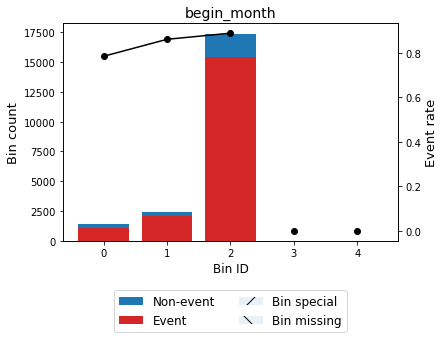

In [87]:
variable = 'begin_month'

x = train_df[variable].values
y = train_df.credit

optb = OptimalBinning(name = variable, dtype = "numerical", solver = "cp", max_n_prebins = 3)
optb.fit(x, y)
    
binning_table = optb.binning_table
v1 = binning_table.build()
    
display(v1)
binning_table.plot(metric = 'event_rate')

In [88]:
# train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_train_transform_bins = optb.transform(train_df['begin_month'], metric="bins")
train_df['begin_month_bin'] = x_train_transform_bins

# test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_test_transform_bins = optb.transform(test_df['begin_month'], metric="bins")
test_df['begin_month_bin'] = x_test_transform_bins

- Categorical Data

In [89]:
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list : 
    variable = i
    x = train_df[variable].values
    y = train_df.credit
    
    optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
    optb.fit(x, y)
    
    binning_table = optb.binning_table
    v1 = binning_table.build()
    
    loop_df = pd.DataFrame({'val' : variable, 'IV' : [v1.loc['Totals', 'IV']]})
    iv_df.append(loop_df)
    
iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

,val,IV
8,UserCode,4.094764
7,occyp_type,0.007379
12,family_size,0.002007
11,email,0.001501
10,phone,0.001146
4,edu_type,0.001013
5,family_type,0.000927
3,income_type,0.000267
6,house_type,0.000113
9,work_phone,0.000082


In [90]:
# variable = 'UserCode'

# x = train_df[variable].values
# y = train_df.credit

# optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
# optb.fit(x, y)
    
# binning_table = optb.binning_table
# v1 = binning_table.build()
    
# display(v1)
# binning_table.plot(metric = 'event_rate')

In [91]:
# # train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
# x_train_transform_bins = optb.transform(train_df['UserCode'], metric="bins")
# train_df['UserCode_bin'] = x_train_transform_bins

# # test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
# x_test_transform_bins = optb.transform(test_df['UserCode'], metric="bins")
# test_df['UserCode_bin'] = x_test_transform_bins

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[IT staff, Secretaries, Private service staff,...",4956,0.234404,641,4315,0.870662,0.069652,0.001167,0.000146
1,"[Laborers, High skill tech staff, Low-skill La...",4526,0.214066,583,3943,0.871189,0.064965,0.000926,0.000116
2,"[Sales staff, Cooking staff, Managers]",4158,0.196661,513,3645,0.876623,0.015639,0.000048,0.000006
3,[Retired_Pensioner],1827,0.086412,219,1608,0.880131,-0.0172,0.000025,0.000003
4,[Drivers],1216,0.057513,139,1077,0.885691,-0.070986,0.000282,0.000035
5,"[Workers, Cleaning staff]",3228,0.152675,358,2870,0.889095,-0.105059,0.001619,0.000202
6,"[Medicine staff, Realty agents, Not_retired, S...",1232,0.058270,120,1112,0.902597,-0.249949,0.003310,0.000413
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,21143,1.000000,2573,18570,0.878305,,0.007379,0.000921


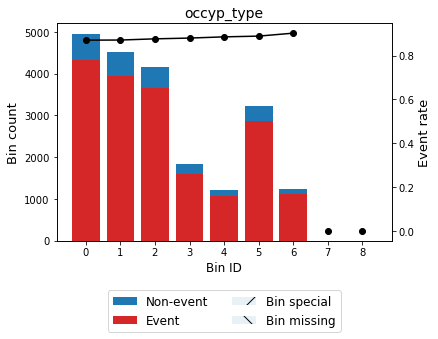

In [92]:
variable = 'occyp_type'

x = train_df[variable].values
y = train_df.credit

optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
optb.fit(x, y)
    
binning_table = optb.binning_table
v1 = binning_table.build()
    
display(v1)
binning_table.plot(metric = 'event_rate')

In [93]:
# train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_train_transform_bins = optb.transform(train_df['occyp_type'], metric="bins")
train_df['occyp_type_bin'] = x_train_transform_bins

# test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_test_transform_bins = optb.transform(test_df['occyp_type'], metric="bins")
test_df['occyp_type_bin'] = x_test_transform_bins

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21164
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21143 non-null  int64  
 1   gender         21143 non-null  object 
 2   car            21143 non-null  object 
 3   reality        21143 non-null  object 
 4   child_num      21143 non-null  int64  
 5   income_total   21143 non-null  float64
 6   income_type    21143 non-null  object 
 7   edu_type       21143 non-null  object 
 8   family_type    21143 non-null  object 
 9   house_type     21143 non-null  object 
 10  DAYS_BIRTH     21143 non-null  int64  
 11  DAYS_EMPLOYED  21143 non-null  int64  
 12  FLAG_MOBIL     21143 non-null  int64  
 13  work_phone     21143 non-null  int64  
 14  phone          21143 non-null  int64  
 15  email          21143 non-null  int64  
 16  occyp_type     21143 non-null  object 
 17  family_size    21143 non-null  float64
 18  begin_month

In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5292 non-null   int64  
 1   gender         5292 non-null   object 
 2   car            5292 non-null   object 
 3   reality        5292 non-null   object 
 4   child_num      5292 non-null   int64  
 5   income_total   5292 non-null   float64
 6   income_type    5292 non-null   object 
 7   edu_type       5292 non-null   object 
 8   family_type    5292 non-null   object 
 9   house_type     5292 non-null   object 
 10  DAYS_BIRTH     5292 non-null   int64  
 11  DAYS_EMPLOYED  5292 non-null   int64  
 12  FLAG_MOBIL     5292 non-null   int64  
 13  work_phone     5292 non-null   int64  
 14  phone          5292 non-null   int64  
 15  email          5292 non-null   int64  
 16  occyp_type     5292 non-null   object 
 17  family_size    5292 non-null   float64
 18  begin_mo

### Scaling

1) Numerical column, Categorical column 나누기

In [96]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train_df.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [97]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['work_phone', 'phone', 'email', 'family_size']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [98]:
print(numerical_list)
print(categorical_list)

['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'credit', 'age', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_m', 'before_EMPLOYED_w', 'DAYS_BIRTH_m', 'DAYS_BIRTH_w', 'Age_group', 'EMPLOYED', 'DAYS_EMPLOYED_m', 'DAYS_EMPLOYED_w', 'ability', 'income_mean', 'income_pow', 'diff_fam_child', 'begin_month_y', 'begin_month_w', 'begin_month_d', 'cluster']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode', 'begin_month_bin', 'occyp_type_bin', 'work_phone', 'phone', 'email', 'family_size']


2) income_total, income_pow 컬럼은 로그변환 수행

In [99]:
train_df['income_total'] = np.log1p(1+train_df['income_total'])
test_df['income_total'] = np.log1p(1+test_df['income_total'])

train_df['income_pow'] = np.log1p(1+train_df['income_pow'])
test_df['income_pow'] = np.log1p(1+test_df['income_pow'])

3) Categorical data에 대해 Original Encoder 수행

In [100]:
encoder = OrdinalEncoder(categorical_list)
train_df[categorical_list] = encoder.fit_transform(train_df[categorical_list], train_df['credit'])
test_df[categorical_list] = encoder.transform(test_df[categorical_list])

In [101]:
train_df['UserCode'] = train_df['UserCode'].astype('int64')
test_df['UserCode'] = test_df['UserCode'].astype('int64')

4) Standard Scaler

In [102]:
numerical_list.remove('income_total')
numerical_list.remove('credit')

scaler = StandardScaler()
train_df[numerical_list] = scaler.fit_transform(train_df[numerical_list])
test_df[numerical_list] = scaler.transform(test_df[numerical_list])

### 다중공선성 분석

1) VIF 분석

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# numerical_list에 저장된 컬럼에 대해 데이터프레임 생성
numerical_df = train_df[numerical_list]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

In [104]:
vif_data[vif_data["VIF"] >= 10]

,feature,VIF
1,DAYS_BIRTH,inf
2,DAYS_EMPLOYED,inf
3,begin_month,inf
4,age,1808.484597
5,before_EMPLOYED,inf
6,income_total_befofeEMP_ratio,12.238809
11,Age_group,17.713049
12,EMPLOYED,774.492741
15,ability,15.470836
19,begin_month_y,23.806479


In [105]:
columns_to_drop = ['begin_month_d', 'begin_month_w', 'begin_month_y', 'age', 'before_EMPLOYED',
                    'EMPLOYED', 'Age_group', 'income_total_befofeEMP_ratio']
for i in columns_to_drop : 
    numerical_list.remove(i)

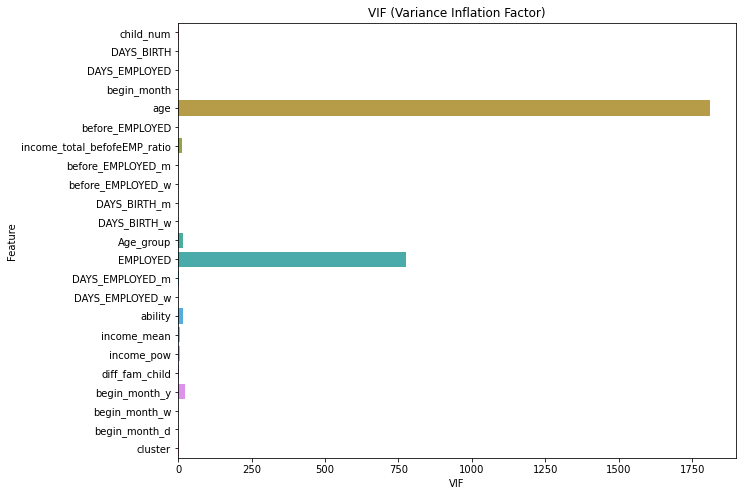

In [106]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x="VIF", y="feature", data=vif_data)
plt.title("VIF (Variance Inflation Factor)")
plt.xlabel("VIF")
plt.ylabel("Feature")
plt.show()

In [107]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21164
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             21143 non-null  int32  
 1   car                21143 non-null  int32  
 2   reality            21143 non-null  int32  
 3   child_num          21143 non-null  float64
 4   income_total       21143 non-null  float64
 5   income_type        21143 non-null  int32  
 6   edu_type           21143 non-null  int32  
 7   family_type        21143 non-null  int32  
 8   house_type         21143 non-null  int32  
 9   DAYS_BIRTH         21143 non-null  float64
 10  DAYS_EMPLOYED      21143 non-null  float64
 11  work_phone         21143 non-null  int64  
 12  phone              21143 non-null  int64  
 13  email              21143 non-null  int64  
 14  occyp_type         21143 non-null  int32  
 15  family_size        21143 non-null  float64
 16  begin_month        21143 no

2) 상관관계 분석

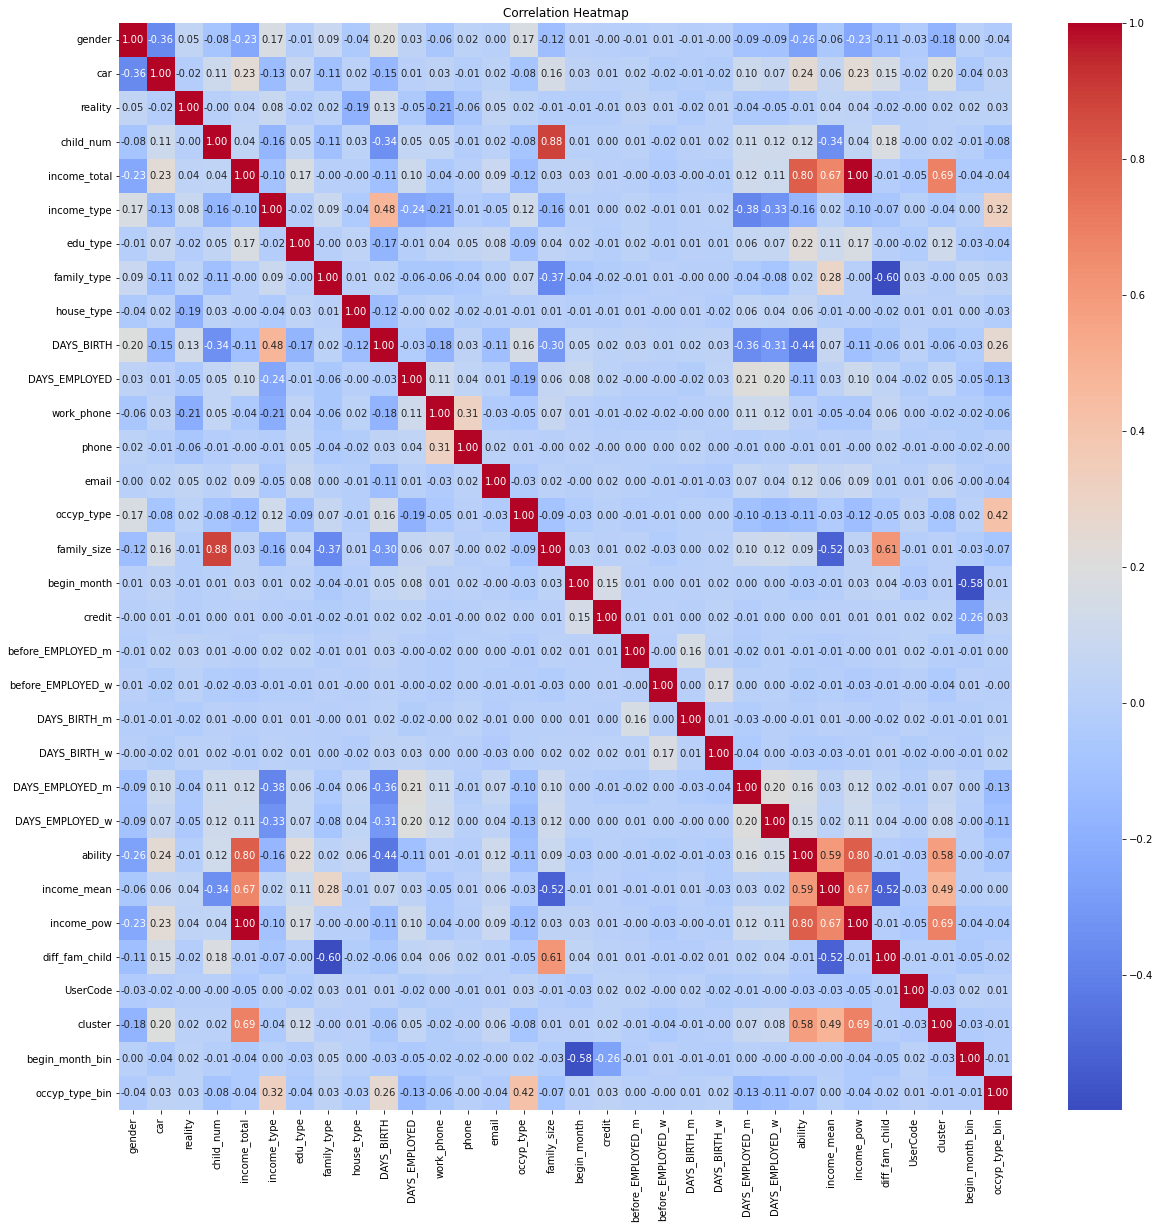

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 구하기
correlation_matrix = train_df.corr()

# heatmap 시각화
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [110]:
# correlation_matrix에서 0.7 이상인 상관관계를 가진 컬럼 쌍 찾기
high_correlation_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = correlation_matrix.columns[i]
            high_correlation_columns.add(colname)
            colname = correlation_matrix.columns[j]
            high_correlation_columns.add(colname)

# 상관관계가 0.7 이상인 컬럼들 출력
display("상관관계가 0.7 이상인 컬럼들:", high_correlation_columns)

'상관관계가 0.7 이상인 컬럼들:'

{'ability', 'child_num', 'family_size', 'income_pow', 'income_total'}

3) 컬럼 제거

In [111]:
columns_to_drop = ['ability', 'income_total', 'child_num']

In [112]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

### Modeling

1) 학습, 테스트 데이터셋 재정의

In [113]:
y_train = train_df['credit']
x_train = train_df.drop('credit', axis=1)
x_test = test_df.drop('credit', axis=1)
y_test = test_df['credit']

In [115]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21164
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             21143 non-null  int32  
 1   car                21143 non-null  int32  
 2   reality            21143 non-null  int32  
 3   income_type        21143 non-null  int32  
 4   edu_type           21143 non-null  int32  
 5   family_type        21143 non-null  int32  
 6   house_type         21143 non-null  int32  
 7   DAYS_BIRTH         21143 non-null  float64
 8   DAYS_EMPLOYED      21143 non-null  float64
 9   work_phone         21143 non-null  int64  
 10  phone              21143 non-null  int64  
 11  email              21143 non-null  int64  
 12  occyp_type         21143 non-null  int32  
 13  family_size        21143 non-null  float64
 14  begin_month        21143 non-null  float64
 15  before_EMPLOYED_m  21143 non-null  float64
 16  before_EMPLOYED_w  21143 no

In [116]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5292 entries, 0 to 5291
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5292 non-null   int32  
 1   car                5292 non-null   int32  
 2   reality            5292 non-null   int32  
 3   income_type        5292 non-null   int32  
 4   edu_type           5292 non-null   int32  
 5   family_type        5292 non-null   int32  
 6   house_type         5292 non-null   int32  
 7   DAYS_BIRTH         5292 non-null   float64
 8   DAYS_EMPLOYED      5292 non-null   float64
 9   work_phone         5292 non-null   int64  
 10  phone              5292 non-null   int64  
 11  email              5292 non-null   int64  
 12  occyp_type         5292 non-null   int32  
 13  family_size        5292 non-null   float64
 14  begin_month        5292 non-null   float64
 15  before_EMPLOYED_m  5292 non-null   float64
 16  before_EMPLOYED_w  5292 non-n

In [118]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

### GridSearchCV & CatBoost Classifier

In [119]:
n_est = 2000
seed = 42
n_fold = 5
n_class = 3

In [126]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from catboost import Pool
import numpy as np
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items



# CatBoost 모델 객체 생성
model_cat = CatBoostClassifier()

param_grid = {
    'l2_leaf_reg': [1, 2],
    'iterations': [200],    
    'learning_rate': [0.1],
    'depth': [4, 5, 6],
    'random_strength': [1],
}

cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode']

# GridSearchCV 객체 생성
grid_search_cat = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss',refit = True, verbose = 100)

# 그리드서치를 사용하여 모델 학습
grid_search_cat.fit(x_train, y_train, cat_features=cat_cols)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_cat.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_cat_proba = grid_search_cat.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_cat_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 1.0434137	total: 178ms	remaining: 35.5s
1:	learn: 0.9995953	total: 199ms	remaining: 19.7s
2:	learn: 0.9650865	total: 217ms	remaining: 14.3s
3:	learn: 0.9380744	total: 236ms	remaining: 11.6s
4:	learn: 0.9156296	total: 251ms	remaining: 9.79s
5:	learn: 0.8973928	total: 261ms	remaining: 8.43s
6:	learn: 0.8824667	total: 279ms	remaining: 7.7s
7:	learn: 0.8712498	total: 302ms	remaining: 7.24s
8:	learn: 0.8609550	total: 317ms	remaining: 6.73s
9:	learn: 0.8523383	total: 337ms	remaining: 6.4s
10:	learn: 0.8458309	total: 360ms	remaining: 6.19s
11:	learn: 0.8280303	total: 385ms	remaining: 6.03s
12:	learn: 0.8138753	total: 404ms	remaining: 5.82s
13:	learn: 0.8024685	total: 423ms	remaining: 5.62s
14:	learn: 0.7933315	total: 442ms	remaining: 5.45s
15:	learn: 0.7855627	total: 489ms	remaining: 5.62s
16:	learn: 0.7792291	total: 519ms	remai

161:	learn: 0.7233634	total: 3.56s	remaining: 834ms
162:	learn: 0.7232105	total: 3.58s	remaining: 812ms
163:	learn: 0.7231253	total: 3.6s	remaining: 790ms
164:	learn: 0.7230288	total: 3.62s	remaining: 768ms
165:	learn: 0.7229167	total: 3.64s	remaining: 746ms
166:	learn: 0.7228677	total: 3.66s	remaining: 723ms
167:	learn: 0.7227730	total: 3.68s	remaining: 701ms
168:	learn: 0.7226796	total: 3.7s	remaining: 679ms
169:	learn: 0.7226264	total: 3.72s	remaining: 657ms
170:	learn: 0.7225349	total: 3.74s	remaining: 635ms
171:	learn: 0.7224885	total: 3.76s	remaining: 612ms
172:	learn: 0.7223342	total: 3.78s	remaining: 590ms
173:	learn: 0.7221725	total: 3.8s	remaining: 568ms
174:	learn: 0.7220942	total: 3.82s	remaining: 546ms
175:	learn: 0.7219867	total: 3.84s	remaining: 523ms
176:	learn: 0.7218057	total: 3.86s	remaining: 501ms
177:	learn: 0.7217247	total: 3.88s	remaining: 479ms
178:	learn: 0.7216621	total: 3.9s	remaining: 457ms
179:	learn: 0.7214924	total: 3.92s	remaining: 435ms
180:	learn: 0.72

124:	learn: 0.7264075	total: 2.56s	remaining: 1.54s
125:	learn: 0.7262302	total: 2.58s	remaining: 1.51s
126:	learn: 0.7261260	total: 2.6s	remaining: 1.49s
127:	learn: 0.7258891	total: 2.62s	remaining: 1.48s
128:	learn: 0.7257060	total: 2.64s	remaining: 1.45s
129:	learn: 0.7255135	total: 2.66s	remaining: 1.43s
130:	learn: 0.7254067	total: 2.68s	remaining: 1.41s
131:	learn: 0.7253299	total: 2.7s	remaining: 1.39s
132:	learn: 0.7250202	total: 2.73s	remaining: 1.37s
133:	learn: 0.7248543	total: 2.75s	remaining: 1.35s
134:	learn: 0.7246862	total: 2.78s	remaining: 1.34s
135:	learn: 0.7245085	total: 2.8s	remaining: 1.32s
136:	learn: 0.7243088	total: 2.82s	remaining: 1.3s
137:	learn: 0.7242720	total: 2.85s	remaining: 1.28s
138:	learn: 0.7241222	total: 2.87s	remaining: 1.26s
139:	learn: 0.7240828	total: 2.89s	remaining: 1.24s
140:	learn: 0.7240155	total: 2.91s	remaining: 1.22s
141:	learn: 0.7238671	total: 2.93s	remaining: 1.2s
142:	learn: 0.7237698	total: 2.95s	remaining: 1.18s
143:	learn: 0.723

86:	learn: 0.7355053	total: 1.68s	remaining: 2.19s
87:	learn: 0.7353903	total: 1.7s	remaining: 2.17s
88:	learn: 0.7351011	total: 1.72s	remaining: 2.15s
89:	learn: 0.7348924	total: 1.74s	remaining: 2.13s
90:	learn: 0.7344985	total: 1.76s	remaining: 2.11s
91:	learn: 0.7343730	total: 1.78s	remaining: 2.09s
92:	learn: 0.7342336	total: 1.81s	remaining: 2.09s
93:	learn: 0.7339015	total: 1.84s	remaining: 2.08s
94:	learn: 0.7337136	total: 1.86s	remaining: 2.06s
95:	learn: 0.7336804	total: 1.89s	remaining: 2.05s
96:	learn: 0.7335405	total: 1.92s	remaining: 2.04s
97:	learn: 0.7334785	total: 1.94s	remaining: 2.02s
98:	learn: 0.7333942	total: 1.96s	remaining: 2s
99:	learn: 0.7332315	total: 1.98s	remaining: 1.98s
100:	learn: 0.7331774	total: 2s	remaining: 1.96s
101:	learn: 0.7329993	total: 2.02s	remaining: 1.94s
102:	learn: 0.7328291	total: 2.04s	remaining: 1.92s
103:	learn: 0.7327885	total: 2.06s	remaining: 1.9s
104:	learn: 0.7326274	total: 2.08s	remaining: 1.88s
105:	learn: 0.7324397	total: 2.1s	

49:	learn: 0.7417575	total: 912ms	remaining: 2.74s
50:	learn: 0.7412932	total: 933ms	remaining: 2.73s
51:	learn: 0.7407407	total: 953ms	remaining: 2.71s
52:	learn: 0.7403951	total: 971ms	remaining: 2.69s
53:	learn: 0.7402667	total: 989ms	remaining: 2.67s
54:	learn: 0.7401596	total: 999ms	remaining: 2.63s
55:	learn: 0.7400135	total: 1.02s	remaining: 2.62s
56:	learn: 0.7396882	total: 1.04s	remaining: 2.61s
57:	learn: 0.7394403	total: 1.06s	remaining: 2.6s
58:	learn: 0.7392674	total: 1.08s	remaining: 2.58s
59:	learn: 0.7392051	total: 1.1s	remaining: 2.57s
60:	learn: 0.7389070	total: 1.12s	remaining: 2.55s
61:	learn: 0.7386386	total: 1.14s	remaining: 2.54s
62:	learn: 0.7382351	total: 1.16s	remaining: 2.52s
63:	learn: 0.7380779	total: 1.18s	remaining: 2.5s
64:	learn: 0.7380198	total: 1.19s	remaining: 2.48s
65:	learn: 0.7378495	total: 1.21s	remaining: 2.46s
66:	learn: 0.7377783	total: 1.23s	remaining: 2.45s
67:	learn: 0.7376262	total: 1.26s	remaining: 2.45s
68:	learn: 0.7374122	total: 1.29s	

5:	learn: 0.8981588	total: 123ms	remaining: 3.98s
6:	learn: 0.8833511	total: 146ms	remaining: 4.03s
7:	learn: 0.8717688	total: 169ms	remaining: 4.06s
8:	learn: 0.8617394	total: 193ms	remaining: 4.1s
9:	learn: 0.8539826	total: 218ms	remaining: 4.14s
10:	learn: 0.8468458	total: 241ms	remaining: 4.13s
11:	learn: 0.8293272	total: 261ms	remaining: 4.09s
12:	learn: 0.8157646	total: 280ms	remaining: 4.03s
13:	learn: 0.8050900	total: 298ms	remaining: 3.96s
14:	learn: 0.7954426	total: 318ms	remaining: 3.92s
15:	learn: 0.7878511	total: 336ms	remaining: 3.86s
16:	learn: 0.7809573	total: 353ms	remaining: 3.8s
17:	learn: 0.7755649	total: 370ms	remaining: 3.74s
18:	learn: 0.7711010	total: 390ms	remaining: 3.71s
19:	learn: 0.7674340	total: 413ms	remaining: 3.71s
20:	learn: 0.7641370	total: 433ms	remaining: 3.69s
21:	learn: 0.7615566	total: 453ms	remaining: 3.67s
22:	learn: 0.7593366	total: 475ms	remaining: 3.65s
23:	learn: 0.7569729	total: 497ms	remaining: 3.64s
24:	learn: 0.7552436	total: 520ms	rema

169:	learn: 0.7238977	total: 3.55s	remaining: 627ms
170:	learn: 0.7238091	total: 3.57s	remaining: 606ms
171:	learn: 0.7236583	total: 3.59s	remaining: 584ms
172:	learn: 0.7235762	total: 3.61s	remaining: 563ms
173:	learn: 0.7234332	total: 3.63s	remaining: 542ms
174:	learn: 0.7233592	total: 3.65s	remaining: 522ms
175:	learn: 0.7233084	total: 3.68s	remaining: 501ms
176:	learn: 0.7231371	total: 3.73s	remaining: 485ms
177:	learn: 0.7230129	total: 3.75s	remaining: 464ms
178:	learn: 0.7228595	total: 3.78s	remaining: 443ms
179:	learn: 0.7226856	total: 3.83s	remaining: 426ms
180:	learn: 0.7226402	total: 3.85s	remaining: 404ms
181:	learn: 0.7225575	total: 3.87s	remaining: 383ms
182:	learn: 0.7224739	total: 3.89s	remaining: 361ms
183:	learn: 0.7223330	total: 3.91s	remaining: 340ms
184:	learn: 0.7221627	total: 3.93s	remaining: 319ms
185:	learn: 0.7219455	total: 3.95s	remaining: 298ms
186:	learn: 0.7218361	total: 3.97s	remaining: 276ms
187:	learn: 0.7217143	total: 4s	remaining: 255ms
188:	learn: 0.7

127:	learn: 0.7291589	total: 2.53s	remaining: 1.42s
128:	learn: 0.7290289	total: 2.55s	remaining: 1.4s
129:	learn: 0.7290041	total: 2.57s	remaining: 1.38s
130:	learn: 0.7289360	total: 2.59s	remaining: 1.36s
131:	learn: 0.7288938	total: 2.61s	remaining: 1.34s
132:	learn: 0.7287304	total: 2.63s	remaining: 1.32s
133:	learn: 0.7285530	total: 2.65s	remaining: 1.3s
134:	learn: 0.7284226	total: 2.67s	remaining: 1.28s
135:	learn: 0.7283378	total: 2.69s	remaining: 1.26s
136:	learn: 0.7282620	total: 2.71s	remaining: 1.24s
137:	learn: 0.7281355	total: 2.73s	remaining: 1.23s
138:	learn: 0.7280581	total: 2.75s	remaining: 1.21s
139:	learn: 0.7279710	total: 2.77s	remaining: 1.19s
140:	learn: 0.7277747	total: 2.79s	remaining: 1.17s
141:	learn: 0.7277204	total: 2.81s	remaining: 1.15s
142:	learn: 0.7276617	total: 2.83s	remaining: 1.13s
143:	learn: 0.7274286	total: 2.85s	remaining: 1.11s
144:	learn: 0.7273317	total: 2.88s	remaining: 1.09s
145:	learn: 0.7272667	total: 2.9s	remaining: 1.07s
146:	learn: 0.7

88:	learn: 0.7313843	total: 1.84s	remaining: 2.3s
89:	learn: 0.7312393	total: 1.88s	remaining: 2.29s
90:	learn: 0.7311944	total: 1.9s	remaining: 2.27s
91:	learn: 0.7311052	total: 1.92s	remaining: 2.26s
92:	learn: 0.7309806	total: 1.94s	remaining: 2.24s
93:	learn: 0.7308573	total: 1.97s	remaining: 2.22s
94:	learn: 0.7305995	total: 1.99s	remaining: 2.19s
95:	learn: 0.7305108	total: 2s	remaining: 2.17s
96:	learn: 0.7303904	total: 2.03s	remaining: 2.15s
97:	learn: 0.7303121	total: 2.05s	remaining: 2.13s
98:	learn: 0.7300673	total: 2.06s	remaining: 2.11s
99:	learn: 0.7299871	total: 2.08s	remaining: 2.08s
100:	learn: 0.7298400	total: 2.1s	remaining: 2.06s
101:	learn: 0.7296280	total: 2.12s	remaining: 2.04s
102:	learn: 0.7294652	total: 2.15s	remaining: 2.02s
103:	learn: 0.7293240	total: 2.18s	remaining: 2.01s
104:	learn: 0.7291897	total: 2.2s	remaining: 1.99s
105:	learn: 0.7290875	total: 2.23s	remaining: 1.97s
106:	learn: 0.7290157	total: 2.25s	remaining: 1.96s
107:	learn: 0.7288909	total: 2.

45:	learn: 0.7420234	total: 923ms	remaining: 3.09s
46:	learn: 0.7417752	total: 949ms	remaining: 3.09s
47:	learn: 0.7415453	total: 974ms	remaining: 3.08s
48:	learn: 0.7413817	total: 997ms	remaining: 3.07s
49:	learn: 0.7411868	total: 1.02s	remaining: 3.06s
50:	learn: 0.7409579	total: 1.04s	remaining: 3.04s
51:	learn: 0.7409136	total: 1.06s	remaining: 3.01s
52:	learn: 0.7407752	total: 1.08s	remaining: 2.99s
53:	learn: 0.7406937	total: 1.1s	remaining: 2.97s
54:	learn: 0.7402426	total: 1.12s	remaining: 2.96s
55:	learn: 0.7397079	total: 1.14s	remaining: 2.93s
56:	learn: 0.7395460	total: 1.17s	remaining: 2.94s
57:	learn: 0.7391748	total: 1.19s	remaining: 2.91s
58:	learn: 0.7390769	total: 1.21s	remaining: 2.89s
59:	learn: 0.7390382	total: 1.23s	remaining: 2.87s
60:	learn: 0.7387828	total: 1.25s	remaining: 2.85s
61:	learn: 0.7387494	total: 1.27s	remaining: 2.82s
62:	learn: 0.7386155	total: 1.29s	remaining: 2.82s
63:	learn: 0.7384617	total: 1.32s	remaining: 2.8s
64:	learn: 0.7379555	total: 1.34s

8:	learn: 0.8610796	total: 152ms	remaining: 3.22s
9:	learn: 0.8525338	total: 173ms	remaining: 3.28s
10:	learn: 0.8455204	total: 190ms	remaining: 3.27s
11:	learn: 0.8286712	total: 213ms	remaining: 3.34s
12:	learn: 0.8141956	total: 235ms	remaining: 3.39s
13:	learn: 0.8035510	total: 257ms	remaining: 3.41s
14:	learn: 0.7937785	total: 288ms	remaining: 3.55s
15:	learn: 0.7868440	total: 310ms	remaining: 3.56s
16:	learn: 0.7813585	total: 325ms	remaining: 3.5s
17:	learn: 0.7758767	total: 346ms	remaining: 3.5s
18:	learn: 0.7710733	total: 365ms	remaining: 3.48s
19:	learn: 0.7680560	total: 385ms	remaining: 3.47s
20:	learn: 0.7644436	total: 406ms	remaining: 3.46s
21:	learn: 0.7614521	total: 424ms	remaining: 3.43s
22:	learn: 0.7587880	total: 442ms	remaining: 3.4s
23:	learn: 0.7567237	total: 458ms	remaining: 3.36s
24:	learn: 0.7551284	total: 476ms	remaining: 3.33s
25:	learn: 0.7535324	total: 493ms	remaining: 3.3s
26:	learn: 0.7524019	total: 512ms	remaining: 3.28s
27:	learn: 0.7506726	total: 532ms	rem

172:	learn: 0.7249492	total: 3.58s	remaining: 559ms
173:	learn: 0.7247999	total: 3.6s	remaining: 538ms
174:	learn: 0.7247434	total: 3.62s	remaining: 517ms
175:	learn: 0.7247137	total: 3.64s	remaining: 497ms
176:	learn: 0.7245968	total: 3.67s	remaining: 476ms
177:	learn: 0.7244304	total: 3.69s	remaining: 456ms
178:	learn: 0.7243059	total: 3.71s	remaining: 436ms
179:	learn: 0.7242501	total: 3.74s	remaining: 415ms
180:	learn: 0.7241209	total: 3.76s	remaining: 395ms
181:	learn: 0.7239491	total: 3.78s	remaining: 374ms
182:	learn: 0.7238914	total: 3.8s	remaining: 353ms
183:	learn: 0.7237940	total: 3.82s	remaining: 333ms
184:	learn: 0.7237115	total: 3.84s	remaining: 312ms
185:	learn: 0.7236374	total: 3.86s	remaining: 291ms
186:	learn: 0.7235881	total: 3.88s	remaining: 270ms
187:	learn: 0.7234677	total: 3.91s	remaining: 249ms
188:	learn: 0.7233148	total: 3.93s	remaining: 229ms
189:	learn: 0.7232244	total: 3.95s	remaining: 208ms
190:	learn: 0.7231459	total: 3.96s	remaining: 187ms
191:	learn: 0.

133:	learn: 0.7292393	total: 2.74s	remaining: 1.35s
134:	learn: 0.7292070	total: 2.76s	remaining: 1.33s
135:	learn: 0.7291491	total: 2.79s	remaining: 1.31s
136:	learn: 0.7290254	total: 2.81s	remaining: 1.29s
137:	learn: 0.7289417	total: 2.84s	remaining: 1.27s
138:	learn: 0.7288730	total: 2.86s	remaining: 1.25s
139:	learn: 0.7288219	total: 2.88s	remaining: 1.24s
140:	learn: 0.7287071	total: 2.9s	remaining: 1.22s
141:	learn: 0.7286726	total: 2.93s	remaining: 1.2s
142:	learn: 0.7286355	total: 2.95s	remaining: 1.17s
143:	learn: 0.7285413	total: 2.96s	remaining: 1.15s
144:	learn: 0.7284785	total: 2.98s	remaining: 1.13s
145:	learn: 0.7283881	total: 3s	remaining: 1.11s
146:	learn: 0.7283250	total: 3.02s	remaining: 1.09s
147:	learn: 0.7282794	total: 3.04s	remaining: 1.07s
148:	learn: 0.7281655	total: 3.06s	remaining: 1.05s
149:	learn: 0.7280708	total: 3.08s	remaining: 1.03s
150:	learn: 0.7280153	total: 3.1s	remaining: 1.01s
151:	learn: 0.7279585	total: 3.13s	remaining: 987ms
152:	learn: 0.7277

89:	learn: 0.7264566	total: 2.31s	remaining: 2.82s
90:	learn: 0.7262124	total: 2.33s	remaining: 2.8s
91:	learn: 0.7260879	total: 2.36s	remaining: 2.77s
92:	learn: 0.7260449	total: 2.38s	remaining: 2.74s
93:	learn: 0.7256943	total: 2.41s	remaining: 2.72s
94:	learn: 0.7254427	total: 2.44s	remaining: 2.69s
95:	learn: 0.7254033	total: 2.45s	remaining: 2.66s
96:	learn: 0.7252855	total: 2.48s	remaining: 2.63s
97:	learn: 0.7250450	total: 2.51s	remaining: 2.61s
98:	learn: 0.7248888	total: 2.53s	remaining: 2.58s
99:	learn: 0.7245575	total: 2.56s	remaining: 2.56s
100:	learn: 0.7243281	total: 2.58s	remaining: 2.53s
101:	learn: 0.7241465	total: 2.61s	remaining: 2.51s
102:	learn: 0.7239491	total: 2.63s	remaining: 2.48s
103:	learn: 0.7238011	total: 2.66s	remaining: 2.46s
104:	learn: 0.7236897	total: 2.69s	remaining: 2.43s
105:	learn: 0.7234900	total: 2.72s	remaining: 2.41s
106:	learn: 0.7232206	total: 2.76s	remaining: 2.4s
107:	learn: 0.7230604	total: 2.8s	remaining: 2.38s
108:	learn: 0.7226778	tota

46:	learn: 0.7354442	total: 1.14s	remaining: 3.71s
47:	learn: 0.7348633	total: 1.17s	remaining: 3.71s
48:	learn: 0.7346148	total: 1.2s	remaining: 3.7s
49:	learn: 0.7342523	total: 1.23s	remaining: 3.7s
50:	learn: 0.7340058	total: 1.26s	remaining: 3.69s
51:	learn: 0.7336788	total: 1.29s	remaining: 3.67s
52:	learn: 0.7333259	total: 1.32s	remaining: 3.65s
53:	learn: 0.7329380	total: 1.34s	remaining: 3.63s
54:	learn: 0.7327100	total: 1.37s	remaining: 3.61s
55:	learn: 0.7325176	total: 1.4s	remaining: 3.59s
56:	learn: 0.7322527	total: 1.42s	remaining: 3.57s
57:	learn: 0.7318483	total: 1.45s	remaining: 3.56s
58:	learn: 0.7315932	total: 1.48s	remaining: 3.53s
59:	learn: 0.7312479	total: 1.5s	remaining: 3.51s
60:	learn: 0.7309054	total: 1.53s	remaining: 3.49s
61:	learn: 0.7306772	total: 1.56s	remaining: 3.47s
62:	learn: 0.7302772	total: 1.58s	remaining: 3.45s
63:	learn: 0.7301715	total: 1.61s	remaining: 3.42s
64:	learn: 0.7297846	total: 1.64s	remaining: 3.4s
65:	learn: 0.7297163	total: 1.66s	rem

6:	learn: 0.8817949	total: 139ms	remaining: 3.83s
7:	learn: 0.8694305	total: 166ms	remaining: 3.97s
8:	learn: 0.8593401	total: 193ms	remaining: 4.1s
9:	learn: 0.8507250	total: 224ms	remaining: 4.26s
10:	learn: 0.8435394	total: 255ms	remaining: 4.39s
11:	learn: 0.8378288	total: 268ms	remaining: 4.21s
12:	learn: 0.8215070	total: 297ms	remaining: 4.27s
13:	learn: 0.8101481	total: 313ms	remaining: 4.16s
14:	learn: 0.8000277	total: 340ms	remaining: 4.19s
15:	learn: 0.7907290	total: 366ms	remaining: 4.2s
16:	learn: 0.7844913	total: 390ms	remaining: 4.19s
17:	learn: 0.7780603	total: 410ms	remaining: 4.14s
18:	learn: 0.7727887	total: 431ms	remaining: 4.11s
19:	learn: 0.7679021	total: 454ms	remaining: 4.08s
20:	learn: 0.7644332	total: 476ms	remaining: 4.06s
21:	learn: 0.7609968	total: 501ms	remaining: 4.05s
22:	learn: 0.7579224	total: 525ms	remaining: 4.04s
23:	learn: 0.7558484	total: 550ms	remaining: 4.03s
24:	learn: 0.7541162	total: 574ms	remaining: 4.02s
25:	learn: 0.7520612	total: 596ms	rem

170:	learn: 0.7120733	total: 4.59s	remaining: 779ms
171:	learn: 0.7119854	total: 4.62s	remaining: 752ms
172:	learn: 0.7116445	total: 4.65s	remaining: 725ms
173:	learn: 0.7114746	total: 4.67s	remaining: 698ms
174:	learn: 0.7112388	total: 4.7s	remaining: 671ms
175:	learn: 0.7109123	total: 4.72s	remaining: 644ms
176:	learn: 0.7107591	total: 4.75s	remaining: 617ms
177:	learn: 0.7105937	total: 4.79s	remaining: 592ms
178:	learn: 0.7105031	total: 4.82s	remaining: 565ms
179:	learn: 0.7101780	total: 4.84s	remaining: 538ms
180:	learn: 0.7098781	total: 4.87s	remaining: 512ms
181:	learn: 0.7096795	total: 4.9s	remaining: 485ms
182:	learn: 0.7094460	total: 4.93s	remaining: 458ms
183:	learn: 0.7091557	total: 4.96s	remaining: 431ms
184:	learn: 0.7090359	total: 4.99s	remaining: 404ms
185:	learn: 0.7087773	total: 5.01s	remaining: 378ms
186:	learn: 0.7085511	total: 5.04s	remaining: 351ms
187:	learn: 0.7083340	total: 5.07s	remaining: 324ms
188:	learn: 0.7081873	total: 5.1s	remaining: 297ms
189:	learn: 0.7

132:	learn: 0.7180304	total: 3.46s	remaining: 1.74s
133:	learn: 0.7179685	total: 3.49s	remaining: 1.72s
134:	learn: 0.7178461	total: 3.52s	remaining: 1.69s
135:	learn: 0.7177268	total: 3.55s	remaining: 1.67s
136:	learn: 0.7175070	total: 3.57s	remaining: 1.64s
137:	learn: 0.7173914	total: 3.6s	remaining: 1.62s
138:	learn: 0.7172534	total: 3.63s	remaining: 1.59s
139:	learn: 0.7170560	total: 3.66s	remaining: 1.57s
140:	learn: 0.7167378	total: 3.69s	remaining: 1.54s
141:	learn: 0.7164414	total: 3.71s	remaining: 1.52s
142:	learn: 0.7162049	total: 3.75s	remaining: 1.5s
143:	learn: 0.7159282	total: 3.79s	remaining: 1.47s
144:	learn: 0.7156964	total: 3.82s	remaining: 1.45s
145:	learn: 0.7155227	total: 3.86s	remaining: 1.43s
146:	learn: 0.7153857	total: 3.89s	remaining: 1.4s
147:	learn: 0.7152041	total: 3.92s	remaining: 1.38s
148:	learn: 0.7149875	total: 3.94s	remaining: 1.35s
149:	learn: 0.7148317	total: 3.97s	remaining: 1.32s
150:	learn: 0.7146960	total: 4s	remaining: 1.3s
151:	learn: 0.71456

94:	learn: 0.7259755	total: 2.42s	remaining: 2.67s
95:	learn: 0.7259129	total: 2.44s	remaining: 2.65s
96:	learn: 0.7258279	total: 2.47s	remaining: 2.62s
97:	learn: 0.7256122	total: 2.5s	remaining: 2.6s
98:	learn: 0.7253917	total: 2.53s	remaining: 2.58s
99:	learn: 0.7250684	total: 2.55s	remaining: 2.55s
100:	learn: 0.7247934	total: 2.58s	remaining: 2.53s
101:	learn: 0.7246907	total: 2.61s	remaining: 2.5s
102:	learn: 0.7245313	total: 2.63s	remaining: 2.48s
103:	learn: 0.7243647	total: 2.66s	remaining: 2.45s
104:	learn: 0.7241113	total: 2.68s	remaining: 2.43s
105:	learn: 0.7239277	total: 2.71s	remaining: 2.4s
106:	learn: 0.7237063	total: 2.75s	remaining: 2.39s
107:	learn: 0.7235414	total: 2.79s	remaining: 2.37s
108:	learn: 0.7233254	total: 2.81s	remaining: 2.35s
109:	learn: 0.7231329	total: 2.84s	remaining: 2.32s
110:	learn: 0.7229408	total: 2.87s	remaining: 2.3s
111:	learn: 0.7227575	total: 2.89s	remaining: 2.27s
112:	learn: 0.7226974	total: 2.92s	remaining: 2.25s
113:	learn: 0.7225151	t

52:	learn: 0.7357481	total: 1.34s	remaining: 3.71s
53:	learn: 0.7355327	total: 1.37s	remaining: 3.71s
54:	learn: 0.7354018	total: 1.4s	remaining: 3.69s
55:	learn: 0.7350019	total: 1.43s	remaining: 3.67s
56:	learn: 0.7347922	total: 1.46s	remaining: 3.65s
57:	learn: 0.7347209	total: 1.48s	remaining: 3.63s
58:	learn: 0.7345984	total: 1.53s	remaining: 3.65s
59:	learn: 0.7344458	total: 1.56s	remaining: 3.63s
60:	learn: 0.7341154	total: 1.58s	remaining: 3.61s
61:	learn: 0.7337045	total: 1.61s	remaining: 3.59s
62:	learn: 0.7336331	total: 1.64s	remaining: 3.57s
63:	learn: 0.7333372	total: 1.67s	remaining: 3.54s
64:	learn: 0.7332919	total: 1.68s	remaining: 3.49s
65:	learn: 0.7331121	total: 1.71s	remaining: 3.47s
66:	learn: 0.7329738	total: 1.74s	remaining: 3.45s
67:	learn: 0.7328548	total: 1.76s	remaining: 3.42s
68:	learn: 0.7324617	total: 1.78s	remaining: 3.39s
69:	learn: 0.7323091	total: 1.81s	remaining: 3.36s
70:	learn: 0.7322436	total: 1.84s	remaining: 3.34s
71:	learn: 0.7321306	total: 1.87

7:	learn: 0.8687732	total: 176ms	remaining: 4.22s
8:	learn: 0.8586340	total: 198ms	remaining: 4.2s
9:	learn: 0.8501063	total: 224ms	remaining: 4.25s
10:	learn: 0.8325843	total: 252ms	remaining: 4.32s
11:	learn: 0.8191806	total: 276ms	remaining: 4.33s
12:	learn: 0.8067359	total: 299ms	remaining: 4.3s
13:	learn: 0.7966366	total: 323ms	remaining: 4.29s
14:	learn: 0.7880934	total: 349ms	remaining: 4.31s
15:	learn: 0.7798362	total: 376ms	remaining: 4.32s
16:	learn: 0.7750890	total: 402ms	remaining: 4.32s
17:	learn: 0.7706786	total: 428ms	remaining: 4.32s
18:	learn: 0.7667975	total: 447ms	remaining: 4.26s
19:	learn: 0.7623403	total: 484ms	remaining: 4.36s
20:	learn: 0.7589066	total: 510ms	remaining: 4.35s
21:	learn: 0.7564538	total: 564ms	remaining: 4.57s
22:	learn: 0.7543731	total: 610ms	remaining: 4.69s
23:	learn: 0.7520973	total: 640ms	remaining: 4.7s
24:	learn: 0.7504407	total: 667ms	remaining: 4.67s
25:	learn: 0.7485357	total: 691ms	remaining: 4.62s
26:	learn: 0.7472639	total: 709ms	rem

170:	learn: 0.7134628	total: 4.54s	remaining: 769ms
171:	learn: 0.7132917	total: 4.56s	remaining: 742ms
172:	learn: 0.7131214	total: 4.59s	remaining: 716ms
173:	learn: 0.7130201	total: 4.62s	remaining: 690ms
174:	learn: 0.7127449	total: 4.64s	remaining: 663ms
175:	learn: 0.7125791	total: 4.67s	remaining: 637ms
176:	learn: 0.7124165	total: 4.69s	remaining: 610ms
177:	learn: 0.7122757	total: 4.72s	remaining: 583ms
178:	learn: 0.7122111	total: 4.74s	remaining: 557ms
179:	learn: 0.7119887	total: 4.77s	remaining: 530ms
180:	learn: 0.7118539	total: 4.79s	remaining: 503ms
181:	learn: 0.7117338	total: 4.82s	remaining: 477ms
182:	learn: 0.7115079	total: 4.84s	remaining: 450ms
183:	learn: 0.7114611	total: 4.87s	remaining: 424ms
184:	learn: 0.7113884	total: 4.9s	remaining: 397ms
185:	learn: 0.7110767	total: 4.93s	remaining: 371ms
186:	learn: 0.7110237	total: 4.96s	remaining: 345ms
187:	learn: 0.7108174	total: 4.98s	remaining: 318ms
188:	learn: 0.7107253	total: 5.01s	remaining: 291ms
189:	learn: 0

132:	learn: 0.7207321	total: 3.62s	remaining: 1.82s
133:	learn: 0.7203854	total: 3.65s	remaining: 1.8s
134:	learn: 0.7201985	total: 3.67s	remaining: 1.77s
135:	learn: 0.7200832	total: 3.7s	remaining: 1.74s
136:	learn: 0.7199627	total: 3.73s	remaining: 1.71s
137:	learn: 0.7199012	total: 3.76s	remaining: 1.69s
138:	learn: 0.7196909	total: 3.78s	remaining: 1.66s
139:	learn: 0.7194828	total: 3.81s	remaining: 1.63s
140:	learn: 0.7193091	total: 3.84s	remaining: 1.61s
141:	learn: 0.7190559	total: 3.87s	remaining: 1.58s
142:	learn: 0.7189175	total: 3.9s	remaining: 1.55s
143:	learn: 0.7188020	total: 3.94s	remaining: 1.53s
144:	learn: 0.7185843	total: 3.97s	remaining: 1.5s
145:	learn: 0.7183772	total: 4s	remaining: 1.48s
146:	learn: 0.7183153	total: 4.03s	remaining: 1.45s
147:	learn: 0.7182038	total: 4.06s	remaining: 1.43s
148:	learn: 0.7179685	total: 4.1s	remaining: 1.4s
149:	learn: 0.7178160	total: 4.13s	remaining: 1.38s
150:	learn: 0.7175689	total: 4.16s	remaining: 1.35s
151:	learn: 0.7175186

92:	learn: 0.7278312	total: 2.41s	remaining: 2.77s
93:	learn: 0.7277380	total: 2.44s	remaining: 2.75s
94:	learn: 0.7276695	total: 2.46s	remaining: 2.72s
95:	learn: 0.7275654	total: 2.49s	remaining: 2.7s
96:	learn: 0.7274593	total: 2.52s	remaining: 2.68s
97:	learn: 0.7273595	total: 2.54s	remaining: 2.65s
98:	learn: 0.7271698	total: 2.58s	remaining: 2.63s
99:	learn: 0.7268011	total: 2.61s	remaining: 2.61s
100:	learn: 0.7265984	total: 2.63s	remaining: 2.58s
101:	learn: 0.7264388	total: 2.66s	remaining: 2.56s
102:	learn: 0.7261191	total: 2.69s	remaining: 2.53s
103:	learn: 0.7259439	total: 2.71s	remaining: 2.5s
104:	learn: 0.7258068	total: 2.74s	remaining: 2.48s
105:	learn: 0.7255846	total: 2.76s	remaining: 2.45s
106:	learn: 0.7254271	total: 2.79s	remaining: 2.43s
107:	learn: 0.7251298	total: 2.82s	remaining: 2.4s
108:	learn: 0.7249105	total: 2.85s	remaining: 2.38s
109:	learn: 0.7247296	total: 2.88s	remaining: 2.35s
110:	learn: 0.7246331	total: 2.9s	remaining: 2.33s
111:	learn: 0.7242757	to

52:	learn: 0.7361228	total: 1.37s	remaining: 3.8s
53:	learn: 0.7359866	total: 1.4s	remaining: 3.78s
54:	learn: 0.7358239	total: 1.42s	remaining: 3.75s
55:	learn: 0.7355465	total: 1.44s	remaining: 3.71s
56:	learn: 0.7354004	total: 1.47s	remaining: 3.69s
57:	learn: 0.7353326	total: 1.49s	remaining: 3.64s
58:	learn: 0.7351338	total: 1.51s	remaining: 3.61s
59:	learn: 0.7348900	total: 1.53s	remaining: 3.58s
60:	learn: 0.7347304	total: 1.57s	remaining: 3.58s
61:	learn: 0.7345564	total: 1.59s	remaining: 3.55s
62:	learn: 0.7341871	total: 1.62s	remaining: 3.53s
63:	learn: 0.7339949	total: 1.65s	remaining: 3.51s
64:	learn: 0.7337843	total: 1.68s	remaining: 3.48s
65:	learn: 0.7337406	total: 1.7s	remaining: 3.45s
66:	learn: 0.7335043	total: 1.73s	remaining: 3.43s
67:	learn: 0.7332712	total: 1.76s	remaining: 3.42s
68:	learn: 0.7331326	total: 1.79s	remaining: 3.39s
69:	learn: 0.7329037	total: 1.81s	remaining: 3.36s
70:	learn: 0.7327970	total: 1.84s	remaining: 3.34s
71:	learn: 0.7326434	total: 1.86s	

10:	learn: 0.8439423	total: 328ms	remaining: 5.63s
11:	learn: 0.8279289	total: 358ms	remaining: 5.62s
12:	learn: 0.8147970	total: 391ms	remaining: 5.62s
13:	learn: 0.8030083	total: 422ms	remaining: 5.61s
14:	learn: 0.7955092	total: 437ms	remaining: 5.39s
15:	learn: 0.7878855	total: 459ms	remaining: 5.28s
16:	learn: 0.7803784	total: 487ms	remaining: 5.24s
17:	learn: 0.7741073	total: 523ms	remaining: 5.29s
18:	learn: 0.7687477	total: 555ms	remaining: 5.29s
19:	learn: 0.7649040	total: 589ms	remaining: 5.3s
20:	learn: 0.7613583	total: 618ms	remaining: 5.26s
21:	learn: 0.7578802	total: 647ms	remaining: 5.23s
22:	learn: 0.7558173	total: 678ms	remaining: 5.21s
23:	learn: 0.7536104	total: 706ms	remaining: 5.17s
24:	learn: 0.7510863	total: 734ms	remaining: 5.14s
25:	learn: 0.7492926	total: 764ms	remaining: 5.11s
26:	learn: 0.7480684	total: 796ms	remaining: 5.1s
27:	learn: 0.7466346	total: 827ms	remaining: 5.08s
28:	learn: 0.7455352	total: 859ms	remaining: 5.07s
29:	learn: 0.7439730	total: 890ms

171:	learn: 0.6957910	total: 5.87s	remaining: 956ms
172:	learn: 0.6955097	total: 5.91s	remaining: 923ms
173:	learn: 0.6953190	total: 5.95s	remaining: 889ms
174:	learn: 0.6952216	total: 5.98s	remaining: 855ms
175:	learn: 0.6948175	total: 6.01s	remaining: 820ms
176:	learn: 0.6945262	total: 6.05s	remaining: 786ms
177:	learn: 0.6943682	total: 6.08s	remaining: 752ms
178:	learn: 0.6941396	total: 6.13s	remaining: 719ms
179:	learn: 0.6937286	total: 6.16s	remaining: 684ms
180:	learn: 0.6933014	total: 6.19s	remaining: 650ms
181:	learn: 0.6929714	total: 6.22s	remaining: 616ms
182:	learn: 0.6926715	total: 6.26s	remaining: 581ms
183:	learn: 0.6924914	total: 6.29s	remaining: 547ms
184:	learn: 0.6919076	total: 6.33s	remaining: 513ms
185:	learn: 0.6913932	total: 6.36s	remaining: 479ms
186:	learn: 0.6910263	total: 6.39s	remaining: 445ms
187:	learn: 0.6905093	total: 6.43s	remaining: 411ms
188:	learn: 0.6900461	total: 6.47s	remaining: 377ms
189:	learn: 0.6897476	total: 6.51s	remaining: 343ms
190:	learn: 

127:	learn: 0.7037651	total: 4.41s	remaining: 2.48s
128:	learn: 0.7033191	total: 4.45s	remaining: 2.45s
129:	learn: 0.7031229	total: 4.48s	remaining: 2.41s
130:	learn: 0.7028514	total: 4.52s	remaining: 2.38s
131:	learn: 0.7022519	total: 4.56s	remaining: 2.35s
132:	learn: 0.7021271	total: 4.6s	remaining: 2.31s
133:	learn: 0.7018435	total: 4.63s	remaining: 2.28s
134:	learn: 0.7015480	total: 4.66s	remaining: 2.25s
135:	learn: 0.7014368	total: 4.7s	remaining: 2.21s
136:	learn: 0.7012374	total: 4.73s	remaining: 2.17s
137:	learn: 0.7008828	total: 4.76s	remaining: 2.14s
138:	learn: 0.7004845	total: 4.8s	remaining: 2.11s
139:	learn: 0.7002104	total: 4.84s	remaining: 2.07s
140:	learn: 0.6998275	total: 4.87s	remaining: 2.04s
141:	learn: 0.6996210	total: 4.9s	remaining: 2s
142:	learn: 0.6992679	total: 4.94s	remaining: 1.97s
143:	learn: 0.6991751	total: 4.98s	remaining: 1.94s
144:	learn: 0.6989211	total: 5.01s	remaining: 1.9s
145:	learn: 0.6985606	total: 5.04s	remaining: 1.87s
146:	learn: 0.698292

85:	learn: 0.7197506	total: 2.82s	remaining: 3.74s
86:	learn: 0.7196324	total: 2.85s	remaining: 3.7s
87:	learn: 0.7194738	total: 2.88s	remaining: 3.67s
88:	learn: 0.7191758	total: 2.92s	remaining: 3.64s
89:	learn: 0.7188544	total: 2.95s	remaining: 3.61s
90:	learn: 0.7186028	total: 2.98s	remaining: 3.58s
91:	learn: 0.7182394	total: 3.02s	remaining: 3.55s
92:	learn: 0.7179785	total: 3.07s	remaining: 3.53s
93:	learn: 0.7178444	total: 3.11s	remaining: 3.51s
94:	learn: 0.7176963	total: 3.15s	remaining: 3.48s
95:	learn: 0.7173513	total: 3.19s	remaining: 3.45s
96:	learn: 0.7171413	total: 3.22s	remaining: 3.42s
97:	learn: 0.7168134	total: 3.25s	remaining: 3.38s
98:	learn: 0.7162610	total: 3.28s	remaining: 3.34s
99:	learn: 0.7160349	total: 3.33s	remaining: 3.33s
100:	learn: 0.7156439	total: 3.37s	remaining: 3.3s
101:	learn: 0.7153230	total: 3.41s	remaining: 3.27s
102:	learn: 0.7150723	total: 3.45s	remaining: 3.25s
103:	learn: 0.7146737	total: 3.49s	remaining: 3.22s
104:	learn: 0.7141448	total: 

44:	learn: 0.7358319	total: 1.45s	remaining: 4.98s
45:	learn: 0.7352403	total: 1.48s	remaining: 4.96s
46:	learn: 0.7348949	total: 1.51s	remaining: 4.92s
47:	learn: 0.7345408	total: 1.55s	remaining: 4.9s
48:	learn: 0.7339585	total: 1.58s	remaining: 4.87s
49:	learn: 0.7336313	total: 1.62s	remaining: 4.85s
50:	learn: 0.7331852	total: 1.67s	remaining: 4.88s
51:	learn: 0.7329293	total: 1.71s	remaining: 4.85s
52:	learn: 0.7327274	total: 1.74s	remaining: 4.82s
53:	learn: 0.7321357	total: 1.77s	remaining: 4.79s
54:	learn: 0.7318438	total: 1.8s	remaining: 4.76s
55:	learn: 0.7315792	total: 1.84s	remaining: 4.73s
56:	learn: 0.7311859	total: 1.87s	remaining: 4.69s
57:	learn: 0.7307409	total: 1.9s	remaining: 4.66s
58:	learn: 0.7302031	total: 1.93s	remaining: 4.61s
59:	learn: 0.7293671	total: 1.96s	remaining: 4.58s
60:	learn: 0.7289973	total: 1.99s	remaining: 4.54s
61:	learn: 0.7287504	total: 2.02s	remaining: 4.51s
62:	learn: 0.7282668	total: 2.07s	remaining: 4.49s
63:	learn: 0.7281363	total: 2.1s	r

1:	learn: 0.9997128	total: 31.9ms	remaining: 3.16s
2:	learn: 0.9659435	total: 43.3ms	remaining: 2.85s
3:	learn: 0.9385075	total: 77.6ms	remaining: 3.8s
4:	learn: 0.9159996	total: 100ms	remaining: 3.91s
5:	learn: 0.8980434	total: 115ms	remaining: 3.72s
6:	learn: 0.8833134	total: 139ms	remaining: 3.82s
7:	learn: 0.8710646	total: 180ms	remaining: 4.33s
8:	learn: 0.8618045	total: 200ms	remaining: 4.24s
9:	learn: 0.8535302	total: 217ms	remaining: 4.13s
10:	learn: 0.8466198	total: 248ms	remaining: 4.27s
11:	learn: 0.8295403	total: 272ms	remaining: 4.26s
12:	learn: 0.8149254	total: 303ms	remaining: 4.36s
13:	learn: 0.8043184	total: 326ms	remaining: 4.34s
14:	learn: 0.7937739	total: 358ms	remaining: 4.41s
15:	learn: 0.7857030	total: 390ms	remaining: 4.49s
16:	learn: 0.7787340	total: 419ms	remaining: 4.51s
17:	learn: 0.7730080	total: 449ms	remaining: 4.54s
18:	learn: 0.7684040	total: 493ms	remaining: 4.69s
19:	learn: 0.7640352	total: 523ms	remaining: 4.7s
20:	learn: 0.7601128	total: 554ms	remai

165:	learn: 0.6962578	total: 5.55s	remaining: 1.14s
166:	learn: 0.6958844	total: 5.59s	remaining: 1.1s
167:	learn: 0.6956111	total: 5.62s	remaining: 1.07s
168:	learn: 0.6953130	total: 5.66s	remaining: 1.04s
169:	learn: 0.6949415	total: 5.69s	remaining: 1s
170:	learn: 0.6948250	total: 5.73s	remaining: 971ms
171:	learn: 0.6943521	total: 5.76s	remaining: 938ms
172:	learn: 0.6940217	total: 5.79s	remaining: 904ms
173:	learn: 0.6936937	total: 5.83s	remaining: 871ms
174:	learn: 0.6933597	total: 5.86s	remaining: 837ms
175:	learn: 0.6931664	total: 5.89s	remaining: 804ms
176:	learn: 0.6927300	total: 5.93s	remaining: 770ms
177:	learn: 0.6923569	total: 5.96s	remaining: 737ms
178:	learn: 0.6919805	total: 5.99s	remaining: 703ms
179:	learn: 0.6916676	total: 6.03s	remaining: 670ms
180:	learn: 0.6915490	total: 6.07s	remaining: 637ms
181:	learn: 0.6914029	total: 6.1s	remaining: 603ms
182:	learn: 0.6910905	total: 6.14s	remaining: 570ms
183:	learn: 0.6908913	total: 6.17s	remaining: 537ms
184:	learn: 0.690

122:	learn: 0.7148661	total: 3.79s	remaining: 2.37s
123:	learn: 0.7145841	total: 3.82s	remaining: 2.34s
124:	learn: 0.7138769	total: 3.85s	remaining: 2.31s
125:	learn: 0.7136896	total: 3.89s	remaining: 2.28s
126:	learn: 0.7134011	total: 3.92s	remaining: 2.25s
127:	learn: 0.7132366	total: 3.97s	remaining: 2.23s
128:	learn: 0.7129949	total: 4s	remaining: 2.2s
129:	learn: 0.7128202	total: 4.04s	remaining: 2.17s
130:	learn: 0.7124554	total: 4.08s	remaining: 2.15s
131:	learn: 0.7119770	total: 4.11s	remaining: 2.12s
132:	learn: 0.7118030	total: 4.14s	remaining: 2.09s
133:	learn: 0.7114355	total: 4.18s	remaining: 2.06s
134:	learn: 0.7111818	total: 4.21s	remaining: 2.03s
135:	learn: 0.7111260	total: 4.25s	remaining: 2s
136:	learn: 0.7110044	total: 4.28s	remaining: 1.97s
137:	learn: 0.7104510	total: 4.31s	remaining: 1.94s
138:	learn: 0.7104024	total: 4.34s	remaining: 1.91s
139:	learn: 0.7102381	total: 4.38s	remaining: 1.88s
140:	learn: 0.7101088	total: 4.41s	remaining: 1.85s
141:	learn: 0.70986

81:	learn: 0.7199704	total: 2.65s	remaining: 3.81s
82:	learn: 0.7196916	total: 2.68s	remaining: 3.78s
83:	learn: 0.7194397	total: 2.71s	remaining: 3.75s
84:	learn: 0.7191518	total: 2.75s	remaining: 3.72s
85:	learn: 0.7188363	total: 2.78s	remaining: 3.69s
86:	learn: 0.7186089	total: 2.81s	remaining: 3.65s
87:	learn: 0.7183383	total: 2.85s	remaining: 3.62s
88:	learn: 0.7178754	total: 2.89s	remaining: 3.61s
89:	learn: 0.7173047	total: 2.94s	remaining: 3.6s
90:	learn: 0.7168812	total: 2.98s	remaining: 3.57s
91:	learn: 0.7165611	total: 3.03s	remaining: 3.55s
92:	learn: 0.7160062	total: 3.06s	remaining: 3.52s
93:	learn: 0.7157156	total: 3.12s	remaining: 3.52s
94:	learn: 0.7155410	total: 3.15s	remaining: 3.48s
95:	learn: 0.7151502	total: 3.19s	remaining: 3.45s
96:	learn: 0.7149318	total: 3.22s	remaining: 3.42s
97:	learn: 0.7144564	total: 3.25s	remaining: 3.39s
98:	learn: 0.7142251	total: 3.29s	remaining: 3.35s
99:	learn: 0.7141617	total: 3.32s	remaining: 3.32s
100:	learn: 0.7138371	total: 3.3

37:	learn: 0.7399620	total: 1.24s	remaining: 5.26s
38:	learn: 0.7390531	total: 1.26s	remaining: 5.22s
39:	learn: 0.7384847	total: 1.3s	remaining: 5.19s
40:	learn: 0.7379909	total: 1.33s	remaining: 5.17s
41:	learn: 0.7379500	total: 1.35s	remaining: 5.07s
42:	learn: 0.7379047	total: 1.36s	remaining: 4.96s
43:	learn: 0.7373299	total: 1.39s	remaining: 4.93s
44:	learn: 0.7372465	total: 1.41s	remaining: 4.84s
45:	learn: 0.7367734	total: 1.43s	remaining: 4.8s
46:	learn: 0.7364282	total: 1.47s	remaining: 4.78s
47:	learn: 0.7362370	total: 1.5s	remaining: 4.74s
48:	learn: 0.7358291	total: 1.53s	remaining: 4.72s
49:	learn: 0.7355659	total: 1.57s	remaining: 4.7s
50:	learn: 0.7351666	total: 1.6s	remaining: 4.68s
51:	learn: 0.7346831	total: 1.64s	remaining: 4.66s
52:	learn: 0.7342971	total: 1.67s	remaining: 4.63s
53:	learn: 0.7339881	total: 1.7s	remaining: 4.6s
54:	learn: 0.7338478	total: 1.73s	remaining: 4.57s
55:	learn: 0.7336193	total: 1.77s	remaining: 4.55s
56:	learn: 0.7333474	total: 1.8s	remai

[CV 3/5; 6/6] END depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1;, score=-0.688 total time=   7.1s
[CV 4/5; 6/6] START depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1
0:	learn: 1.0425557	total: 8.36ms	remaining: 1.66s
1:	learn: 0.9992693	total: 39.9ms	remaining: 3.95s
2:	learn: 0.9651748	total: 68.5ms	remaining: 4.5s
3:	learn: 0.9376600	total: 89.1ms	remaining: 4.36s
4:	learn: 0.9154650	total: 118ms	remaining: 4.61s
5:	learn: 0.8974766	total: 150ms	remaining: 4.84s
6:	learn: 0.8835365	total: 168ms	remaining: 4.62s
7:	learn: 0.8714556	total: 177ms	remaining: 4.26s
8:	learn: 0.8610319	total: 205ms	remaining: 4.34s
9:	learn: 0.8526949	total: 236ms	remaining: 4.48s
10:	learn: 0.8453411	total: 266ms	remaining: 4.56s
11:	learn: 0.8288876	total: 297ms	remaining: 4.66s
12:	learn: 0.8245934	total: 310ms	remaining: 4.45s
13:	learn: 0.8201414	total: 347ms	remaining: 4.6s
14:	learn: 0.8072247	total: 378ms	remaining: 4.66s
15:	learn: 0.7958

161:	learn: 0.7036954	total: 5.33s	remaining: 1.25s
162:	learn: 0.7035256	total: 5.37s	remaining: 1.22s
163:	learn: 0.7033964	total: 5.4s	remaining: 1.19s
164:	learn: 0.7032854	total: 5.43s	remaining: 1.15s
165:	learn: 0.7030997	total: 5.46s	remaining: 1.12s
166:	learn: 0.7028914	total: 5.49s	remaining: 1.08s
167:	learn: 0.7026522	total: 5.53s	remaining: 1.05s
168:	learn: 0.7022135	total: 5.58s	remaining: 1.02s
169:	learn: 0.7018848	total: 5.62s	remaining: 992ms
170:	learn: 0.7017777	total: 5.65s	remaining: 959ms
171:	learn: 0.7015284	total: 5.69s	remaining: 926ms
172:	learn: 0.7013229	total: 5.73s	remaining: 894ms
173:	learn: 0.7011869	total: 5.76s	remaining: 861ms
174:	learn: 0.7007520	total: 5.79s	remaining: 827ms
175:	learn: 0.7004730	total: 5.82s	remaining: 794ms
176:	learn: 0.7003266	total: 5.86s	remaining: 761ms
177:	learn: 0.7000562	total: 5.89s	remaining: 728ms
178:	learn: 0.6998288	total: 5.92s	remaining: 695ms
179:	learn: 0.6996589	total: 5.96s	remaining: 662ms
180:	learn: 0

118:	learn: 0.7141484	total: 3.9s	remaining: 2.66s
119:	learn: 0.7140390	total: 3.94s	remaining: 2.62s
120:	learn: 0.7137432	total: 3.98s	remaining: 2.6s
121:	learn: 0.7135272	total: 4.01s	remaining: 2.56s
122:	learn: 0.7130889	total: 4.04s	remaining: 2.53s
123:	learn: 0.7126801	total: 4.08s	remaining: 2.5s
124:	learn: 0.7124069	total: 4.12s	remaining: 2.47s
125:	learn: 0.7122911	total: 4.16s	remaining: 2.44s
126:	learn: 0.7119306	total: 4.19s	remaining: 2.41s
127:	learn: 0.7115273	total: 4.23s	remaining: 2.38s
128:	learn: 0.7112164	total: 4.26s	remaining: 2.35s
129:	learn: 0.7110176	total: 4.3s	remaining: 2.32s
130:	learn: 0.7109212	total: 4.33s	remaining: 2.28s
131:	learn: 0.7107690	total: 4.37s	remaining: 2.25s
132:	learn: 0.7103903	total: 4.4s	remaining: 2.22s
133:	learn: 0.7101378	total: 4.43s	remaining: 2.18s
134:	learn: 0.7100256	total: 4.46s	remaining: 2.15s
135:	learn: 0.7095234	total: 4.5s	remaining: 2.12s
136:	learn: 0.7092311	total: 4.53s	remaining: 2.08s
137:	learn: 0.7088

81:	learn: 0.7190354	total: 2.22s	remaining: 3.2s
82:	learn: 0.7189055	total: 2.25s	remaining: 3.17s
83:	learn: 0.7186309	total: 2.28s	remaining: 3.15s
84:	learn: 0.7184217	total: 2.31s	remaining: 3.12s
85:	learn: 0.7182833	total: 2.33s	remaining: 3.09s
86:	learn: 0.7179475	total: 2.36s	remaining: 3.06s
87:	learn: 0.7178643	total: 2.39s	remaining: 3.04s
88:	learn: 0.7177499	total: 2.42s	remaining: 3.02s
89:	learn: 0.7175584	total: 2.45s	remaining: 2.99s
90:	learn: 0.7172315	total: 2.48s	remaining: 2.98s
91:	learn: 0.7171139	total: 2.52s	remaining: 2.95s
92:	learn: 0.7169545	total: 2.54s	remaining: 2.93s
93:	learn: 0.7168479	total: 2.58s	remaining: 2.9s
94:	learn: 0.7166761	total: 2.6s	remaining: 2.88s
95:	learn: 0.7163647	total: 2.63s	remaining: 2.85s
96:	learn: 0.7161979	total: 2.66s	remaining: 2.83s
97:	learn: 0.7160323	total: 2.71s	remaining: 2.81s
98:	learn: 0.7159198	total: 2.73s	remaining: 2.79s
99:	learn: 0.7157816	total: 2.76s	remaining: 2.76s
100:	learn: 0.7156419	total: 2.79s

In [127]:
# 최적 조합을 활용해서 값 예측
pred_y_cat_proba = grid_search_cat.predict_proba(x_test)
pred_y_cat = grid_search_cat.predict(x_test)

In [128]:
from sklearn.metrics import log_loss

# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_cat_proba)
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.706350


In [129]:
# 결과 리포트 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_cat))

              precision    recall  f1-score   support

         0.0       0.53      0.21      0.30       644
         1.0       0.71      0.40      0.51      1254
         2.0       0.74      0.94      0.83      3394

    accuracy                           0.72      5292
   macro avg       0.66      0.52      0.55      5292
weighted avg       0.70      0.72      0.69      5292



In [130]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_cat, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.517787


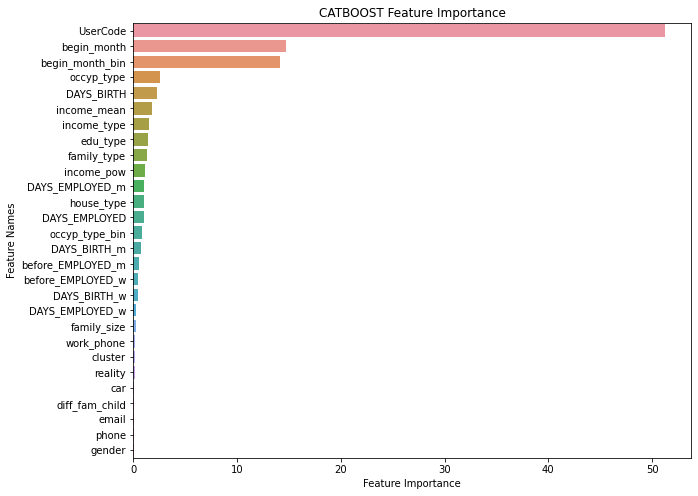

In [131]:
plot_feature_importance(grid_search_cat.best_estimator_.feature_importances_,x_test.columns,'CATBOOST')

### GridSearchCV & LGBM Classifier

In [132]:
# x_train['UserCode_bin'] = x_train['UserCode_bin'].astype('float64')
# x_test['UserCode_bin'] = test_df['UserCode_bin'].astype('float64')

In [133]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
import numpy as np

# LGBMClassifier 모델 객체 생성
model_lgbm = LGBMClassifier()

param_grid = {
    'max_depth': [8],
    'learning_rate': [0.05, 0.1],
    'reg_lambda': [5],
    'min_child_samples': [20, 30],
    'subsample': [0.5, 0.7, 1.0],
}

# GridSearchCV 객체 생성
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss')

# 그리드서치를 사용하여 모델 학습
grid_search_lgbm.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_lgbm.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_lgbm_proba = grid_search_lgbm.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_lgbm_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_samples': 30, 'reg_lambda': 5, 'subsample': 0.5}
Log Loss: 0.642320


In [134]:
# 결과분석
pred_y_lgbm_proba = grid_search_lgbm.predict_proba(x_test)
pred_y_lgbm = grid_search_lgbm.best_estimator_.predict(x_test)

In [135]:
# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_lgbm_proba, labels=[0, 1, 2])
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.758507


In [136]:
# 결과 리포트 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_lgbm))

              precision    recall  f1-score   support

         0.0       0.60      0.04      0.08       644
         1.0       0.73      0.27      0.39      1254
         2.0       0.70      0.98      0.82      3394

    accuracy                           0.70      5292
   macro avg       0.68      0.43      0.43      5292
weighted avg       0.69      0.70      0.63      5292



In [137]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_lgbm, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.431096


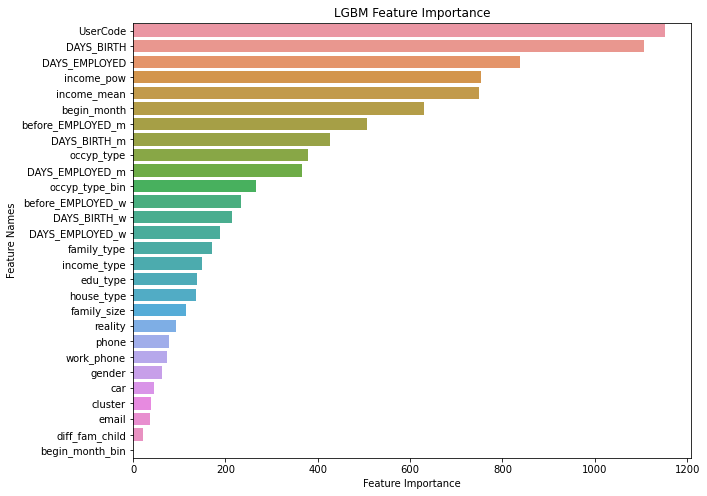

In [138]:
plot_feature_importance(grid_search_lgbm.best_estimator_.feature_importances_,x_test.columns,'LGBM')

### GridSearch & RandomForest

In [139]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 객체 생성
model_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
}

# GridSearchCV 객체 생성
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss')

# 그리드서치를 사용하여 모델 학습
grid_search_rf.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_rf.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_rf_proba = grid_search_rf.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_rf_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Log Loss: 0.411571


In [140]:
# 결과분석
pred_y_rf_proba = grid_search_rf.predict_proba(x_test)
pred_y_rf = grid_search_rf.best_estimator_.predict(x_test)

In [141]:
# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_rf_proba, labels=[0, 1, 2])
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.720398


In [142]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_rf, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.487326


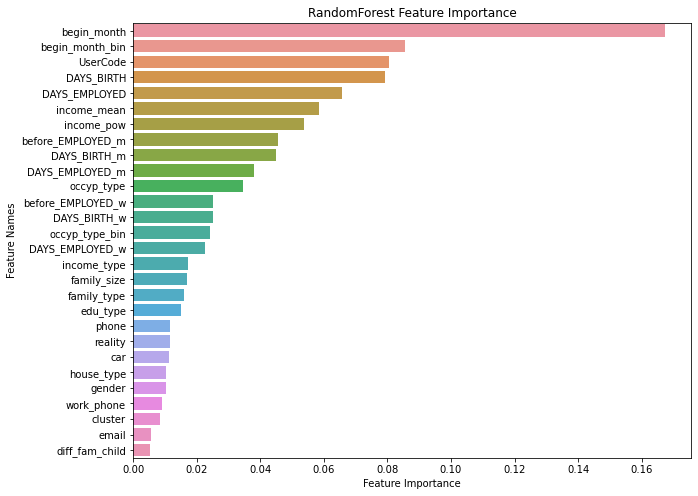

In [143]:
plot_feature_importance(grid_search_rf.best_estimator_.feature_importances_,x_test.columns,'RandomForest')